In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
tms_dir = "../../data/actual/TMS_Actual.csv"
flow_dir = "../../data/actual/FLOW_Actual.csv"
aws368_dir = "../../data/actual/AWS_368.csv"
aws541_dir = "../../data/actual/AWS_541.csv"
aws569_dir = "../../data/actual/AWS_569.csv"

In [3]:
tms = pd.read_csv(tms_dir)
flow = pd.read_csv(flow_dir)
aws368 = pd.read_csv(aws368_dir)
aws541 = pd.read_csv(aws541_dir)
aws569 = pd.read_csv(aws569_dir)

In [4]:
flow = flow.drop(columns=['data_save_dt'])
aws368 = aws368.drop(columns=['YYMMDDHHMI','STN'])
aws541 = aws541.drop(columns=['YYMMDDHHMI','STN'])
aws569 = aws569.drop(columns=['YYMMDDHHMI','STN'])

In [5]:
def time_range(df, time_col):
    df[time_col] = pd.to_datetime(df[time_col])
    df = df.sort_values(time_col)
    print(f"\n시간 컬럼: {time_col}")
    print(f"시작 시간: {df[time_col].min()}")
    print(f"종료 시간: {df[time_col].max()}")

In [62]:
time_range(tms, "SYS_TIME")


시간 컬럼: SYS_TIME
시작 시간: 2024-08-26 15:09:00
종료 시간: 2025-09-29 05:23:00


In [65]:
time_range(flow, "SYS_TIME")


시간 컬럼: SYS_TIME
시작 시간: 2025-09-02 23:53:00
종료 시간: 2025-12-03 10:39:00


In [66]:
time_range(aws368, "datetime")
time_range(aws541, "datetime")
time_range(aws569, "datetime")


시간 컬럼: datetime
시작 시간: 2024-08-01 00:00:00
종료 시간: 2026-01-26 00:00:00

시간 컬럼: datetime
시작 시간: 2024-08-01 00:00:00
종료 시간: 2026-02-28 23:59:00

시간 컬럼: datetime
시작 시간: 2024-08-01 00:00:00
종료 시간: 2026-01-25 05:09:00


In [6]:
tms.name = "tms"
flow.name = "flow"
aws368.name = "aws368"
aws541.name = "aws541"
aws569.name = "aws569"

In [7]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [69]:
def print_summury(df):
    print("=" * 80)
    print("데이터 기본 정보")
    print("=" * 80)
    print(f"데이터 shape: {df.shape}")
    print(f"컬럼 수: {len(df.columns)}")
    print(f"\n컬럼 목록:")
    print(df.columns.tolist())

    print("\n" + "=" * 80)
    print("기술 통계량")
    print("=" * 80)
    print(df.describe())

    print("\n" + "=" * 80)
    print("결측치 정보")
    print("=" * 80)
    missing_info = pd.DataFrame({
        '결측치 수': df.isnull().sum(),
        '결측치 비율(%)': (df.isnull().sum() / len(df) * 100).round(2)
    })
    print(missing_info[missing_info['결측치 수'] > 0])

In [70]:
print_summury(tms)

데이터 기본 정보
데이터 shape: (514551, 7)
컬럼 수: 7

컬럼 목록:
['SYS_TIME', 'TOC_VU', 'PH_VU', 'SS_VU', 'FLUX_VU', 'TN_VU', 'TP_VU']

기술 통계량
                         SYS_TIME         TOC_VU          PH_VU  \
count                      514551  426520.000000  426520.000000   
mean   2025-03-31 17:19:01.333162       5.284904       7.059789   
min           2024-08-26 15:09:00       0.000000       0.000000   
25%           2025-01-03 23:14:30       3.400000       6.900000   
50%           2025-04-03 07:56:00       4.400000       7.100000   
75%           2025-07-01 21:20:30       5.600000       7.200000   
max           2025-09-29 05:23:00     227.900000       8.700000   
std                           NaN      10.287264       0.198564   

               SS_VU       FLUX_VU          TN_VU          TP_VU  
count  426520.000000  4.265250e+05  426524.000000  426520.000000  
mean        1.468980  1.669034e+04       7.087507       0.107971  
min         0.000000  0.000000e+00       0.000000       0.000000  
2

In [71]:
print_summury(flow)

데이터 기본 정보
데이터 shape: (130732, 5)
컬럼 수: 5

컬럼 목록:
['flow_TankA', 'flow_TankB', 'level_TankA', 'level_TankB', 'SYS_TIME']

기술 통계량
          flow_TankA     flow_TankB    level_TankA    level_TankB  \
count  130732.000000  130732.000000  130732.000000  130732.000000   
mean      182.558298     197.106426       2.476384       2.476078   
min         0.000000       0.000000       0.000000       0.000000   
25%       179.775000     180.712500       2.099000       2.096250   
50%       199.537500     200.137500       2.532750       2.530500   
75%       210.150000     220.012500       2.942250       2.940250   
max       321.375000     504.750000       3.812000       3.808250   
std        47.486820      53.949240       0.641248       0.636425   

                         SYS_TIME  
count                      130732  
mean   2025-10-18 17:10:19.964507  
min           2025-09-02 23:53:00  
25%           2025-09-25 20:50:45  
50%           2025-10-18 17:13:30  
75%           2025-11-10 13:38:15 

In [72]:
print_summury(aws368)

데이터 기본 정보
데이터 shape: (781875, 8)
컬럼 수: 8

컬럼 목록:
['TA', 'RN_15m', 'RN_60m', 'RN_12H', 'RN_DAY', 'HM', 'TD', 'datetime']

기술 통계량
                  TA         RN_15m         RN_60m         RN_12H  \
count  770981.000000  769239.000000  768978.000000  764012.000000   
mean       13.591421       0.033726       0.134943       1.618026   
min       -13.400000       0.000000       0.000000       0.000000   
25%         3.200000       0.000000       0.000000       0.000000   
50%        14.700000       0.000000       0.000000       0.000000   
75%        23.900000       0.000000       0.000000       0.000000   
max        37.400000      22.500000      42.500000      90.000000   
std        11.646710       0.342222       1.044970       6.633104   

              RN_DAY             HM             TD                    datetime  
count  769324.000000  770981.000000  770981.000000                      781875  
mean        1.750460      62.364508       5.868343  2025-04-29 11:37:08.457822  
min    

In [73]:
print_summury(aws541)

데이터 기본 정보
데이터 shape: (830880, 8)
컬럼 수: 8

컬럼 목록:
['TA', 'RN_15m', 'RN_60m', 'RN_12H', 'RN_DAY', 'HM', 'TD', 'datetime']

기술 통계량
                  TA         RN_15m         RN_60m         RN_12H  \
count  769246.000000  763316.000000  762927.000000  756621.000000   
mean       13.375797       0.035113       0.140510       1.697510   
min       -15.800000       0.000000       0.000000       0.000000   
25%         2.600000       0.000000       0.000000       0.000000   
50%        14.700000       0.000000       0.000000       0.000000   
75%        24.100000       0.000000       0.000000       0.000000   
max        38.300000      28.000000      44.000000     112.000000   
std        12.198172       0.361223       1.083898       6.937878   

              RN_DAY             HM             TD             datetime  
count  763590.000000  770105.000000  769246.000000               830880  
mean        1.740646      68.527130       7.024391  2025-05-16 11:59:30  
min         0.000000       9

In [74]:
print_summury(aws569)

데이터 기본 정보
데이터 shape: (780790, 8)
컬럼 수: 8

컬럼 목록:
['TA', 'RN_15m', 'RN_60m', 'RN_12H', 'RN_DAY', 'HM', 'TD', 'datetime']

기술 통계량
                  TA         RN_15m         RN_60m         RN_12H  \
count  780698.000000  775157.000000  774756.000000  769995.000000   
mean       13.349130       0.032949       0.131845       1.583143   
min       -13.500000       0.000000       0.000000       0.000000   
25%         3.100000       0.000000       0.000000       0.000000   
50%        14.400000       0.000000       0.000000       0.000000   
75%        23.600000       0.000000       0.000000       0.000000   
max        38.300000      19.500000      41.500000      84.500000   
std        11.652751       0.326720       1.005607       6.468649   

              RN_DAY             HM             TD             datetime  
count  775273.000000  780702.000000  780698.000000               780790  
mean        1.710353      65.689088       6.366488  2025-04-29 02:34:30  
min         0.000000       7

In [75]:
def create_boxplot(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print(f"\n수치형 컬럼 수: {len(numeric_cols)}")
    n_cols = len(numeric_cols)
    n_rows = (n_cols + 2) // 3  # 3열로 배치
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
    axes = axes.flatten() if n_cols > 1 else [axes]

    for idx, col in enumerate(numeric_cols):
        ax = axes[idx]
        df.boxplot(column=col, ax=ax)
        ax.set_title(f'{col}', fontsize=10, fontweight='bold')
        ax.set_ylabel('값')
        
        # 이상치 정보 추가
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]
        ax.text(0.5, 0.02, f'이상치: {len(outliers)}개', 
                transform=ax.transAxes, fontsize=8, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # 빈 subplot 제거
    for idx in range(n_cols, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.savefig(f'../../results/boxplot/{df.name}_boxplot.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n" + "=" * 80)
    print(f"Boxplot 저장 완료: results/boxplot/{df.name}_boxplot.png")
    print("=" * 80)

    # 4. 컬럼별 상세 요약
    print("\n" + "=" * 80)
    print("컬럼별 상세 요약")
    print("=" * 80)
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]
        
        print(f"\n[{col}]")
        print(f"  평균: {df[col].mean():.2f}")
        print(f"  중앙값: {df[col].median():.2f}")
        print(f"  표준편차: {df[col].std():.2f}")
        print(f"  최소값: {df[col].min():.2f}")
        print(f"  최대값: {df[col].max():.2f}")
        print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
        print(f"  이상치 개수: {len(outliers)}개 ({len(outliers)/len(df)*100:.2f}%)")


수치형 컬럼 수: 6


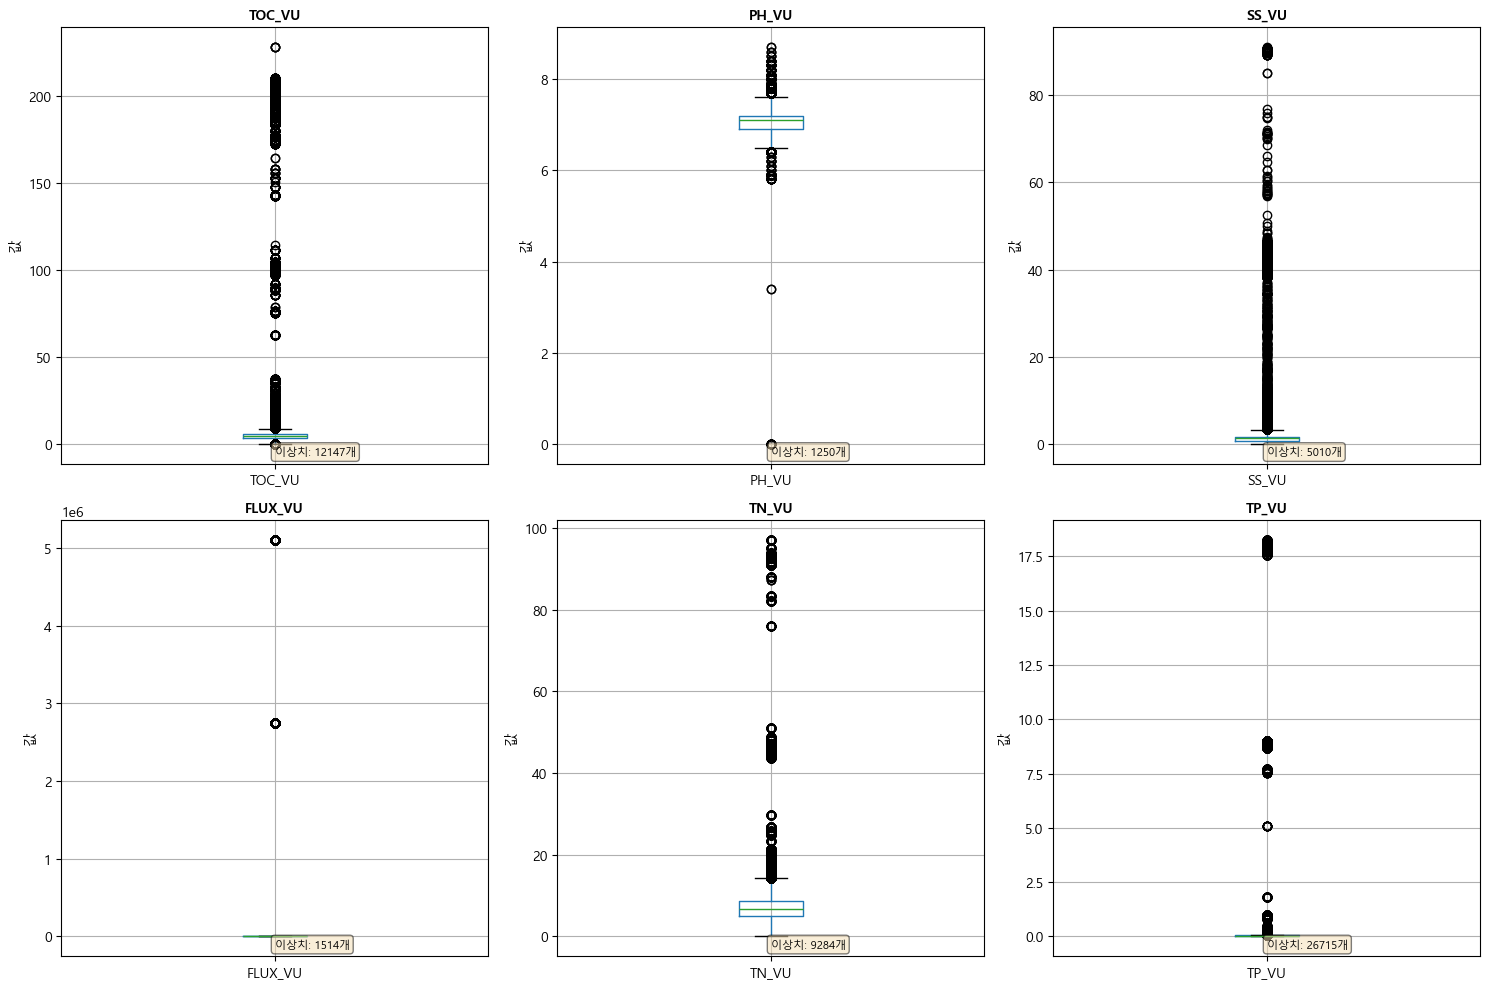


Boxplot 저장 완료: results/boxplot/tms_boxplot.png

컬럼별 상세 요약

[TOC_VU]
  평균: 5.28
  중앙값: 4.40
  표준편차: 10.29
  최소값: 0.00
  최대값: 227.90
  Q1: 3.40, Q3: 5.60, IQR: 2.20
  이상치 개수: 12147개 (2.36%)

[PH_VU]
  평균: 7.06
  중앙값: 7.10
  표준편차: 0.20
  최소값: 0.00
  최대값: 8.70
  Q1: 6.90, Q3: 7.20, IQR: 0.30
  이상치 개수: 1250개 (0.24%)

[SS_VU]
  평균: 1.47
  중앙값: 1.40
  표준편차: 3.04
  최소값: 0.00
  최대값: 91.00
  Q1: 0.60, Q3: 1.70, IQR: 1.10
  이상치 개수: 5010개 (0.97%)

[FLUX_VU]
  평균: 16690.34
  중앙값: 3148.00
  표준편차: 234804.90
  최소값: 0.00
  최대값: 5106780.00
  Q1: 1643.00, Q3: 4847.00, IQR: 3204.00
  이상치 개수: 1514개 (0.29%)

[TN_VU]
  평균: 7.09
  중앙값: 6.83
  표준편차: 5.92
  최소값: 0.00
  최대값: 97.10
  Q1: 5.04, Q3: 8.72, IQR: 3.68
  이상치 개수: 9284개 (1.80%)

[TP_VU]
  평균: 0.11
  중앙값: 0.04
  표준편차: 0.90
  최소값: 0.00
  최대값: 18.27
  Q1: 0.03, Q3: 0.05, IQR: 0.02
  이상치 개수: 26715개 (5.19%)


In [76]:
create_boxplot(tms)


수치형 컬럼 수: 4


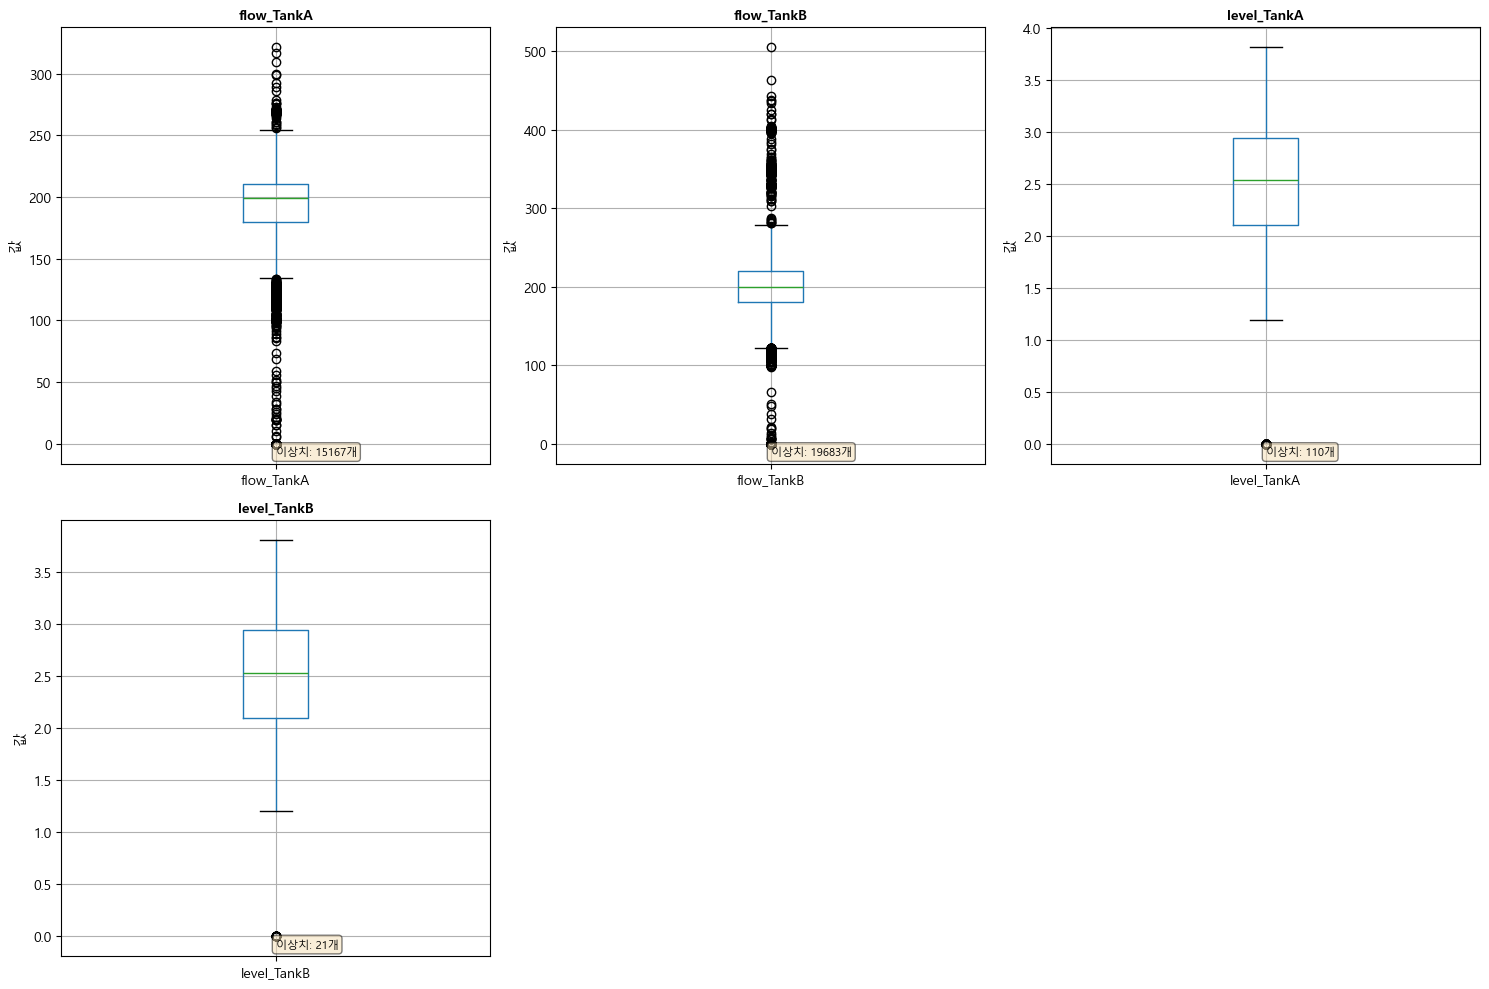


Boxplot 저장 완료: results/boxplot/flow_boxplot.png

컬럼별 상세 요약

[flow_TankA]
  평균: 182.56
  중앙값: 199.54
  표준편차: 47.49
  최소값: 0.00
  최대값: 321.38
  Q1: 179.78, Q3: 210.15, IQR: 30.38
  이상치 개수: 15167개 (11.60%)

[flow_TankB]
  평균: 197.11
  중앙값: 200.14
  표준편차: 53.95
  최소값: 0.00
  최대값: 504.75
  Q1: 180.71, Q3: 220.01, IQR: 39.30
  이상치 개수: 19683개 (15.06%)

[level_TankA]
  평균: 2.48
  중앙값: 2.53
  표준편차: 0.64
  최소값: 0.00
  최대값: 3.81
  Q1: 2.10, Q3: 2.94, IQR: 0.84
  이상치 개수: 110개 (0.08%)

[level_TankB]
  평균: 2.48
  중앙값: 2.53
  표준편차: 0.64
  최소값: 0.00
  최대값: 3.81
  Q1: 2.10, Q3: 2.94, IQR: 0.84
  이상치 개수: 21개 (0.02%)


In [77]:
create_boxplot(flow)


수치형 컬럼 수: 7


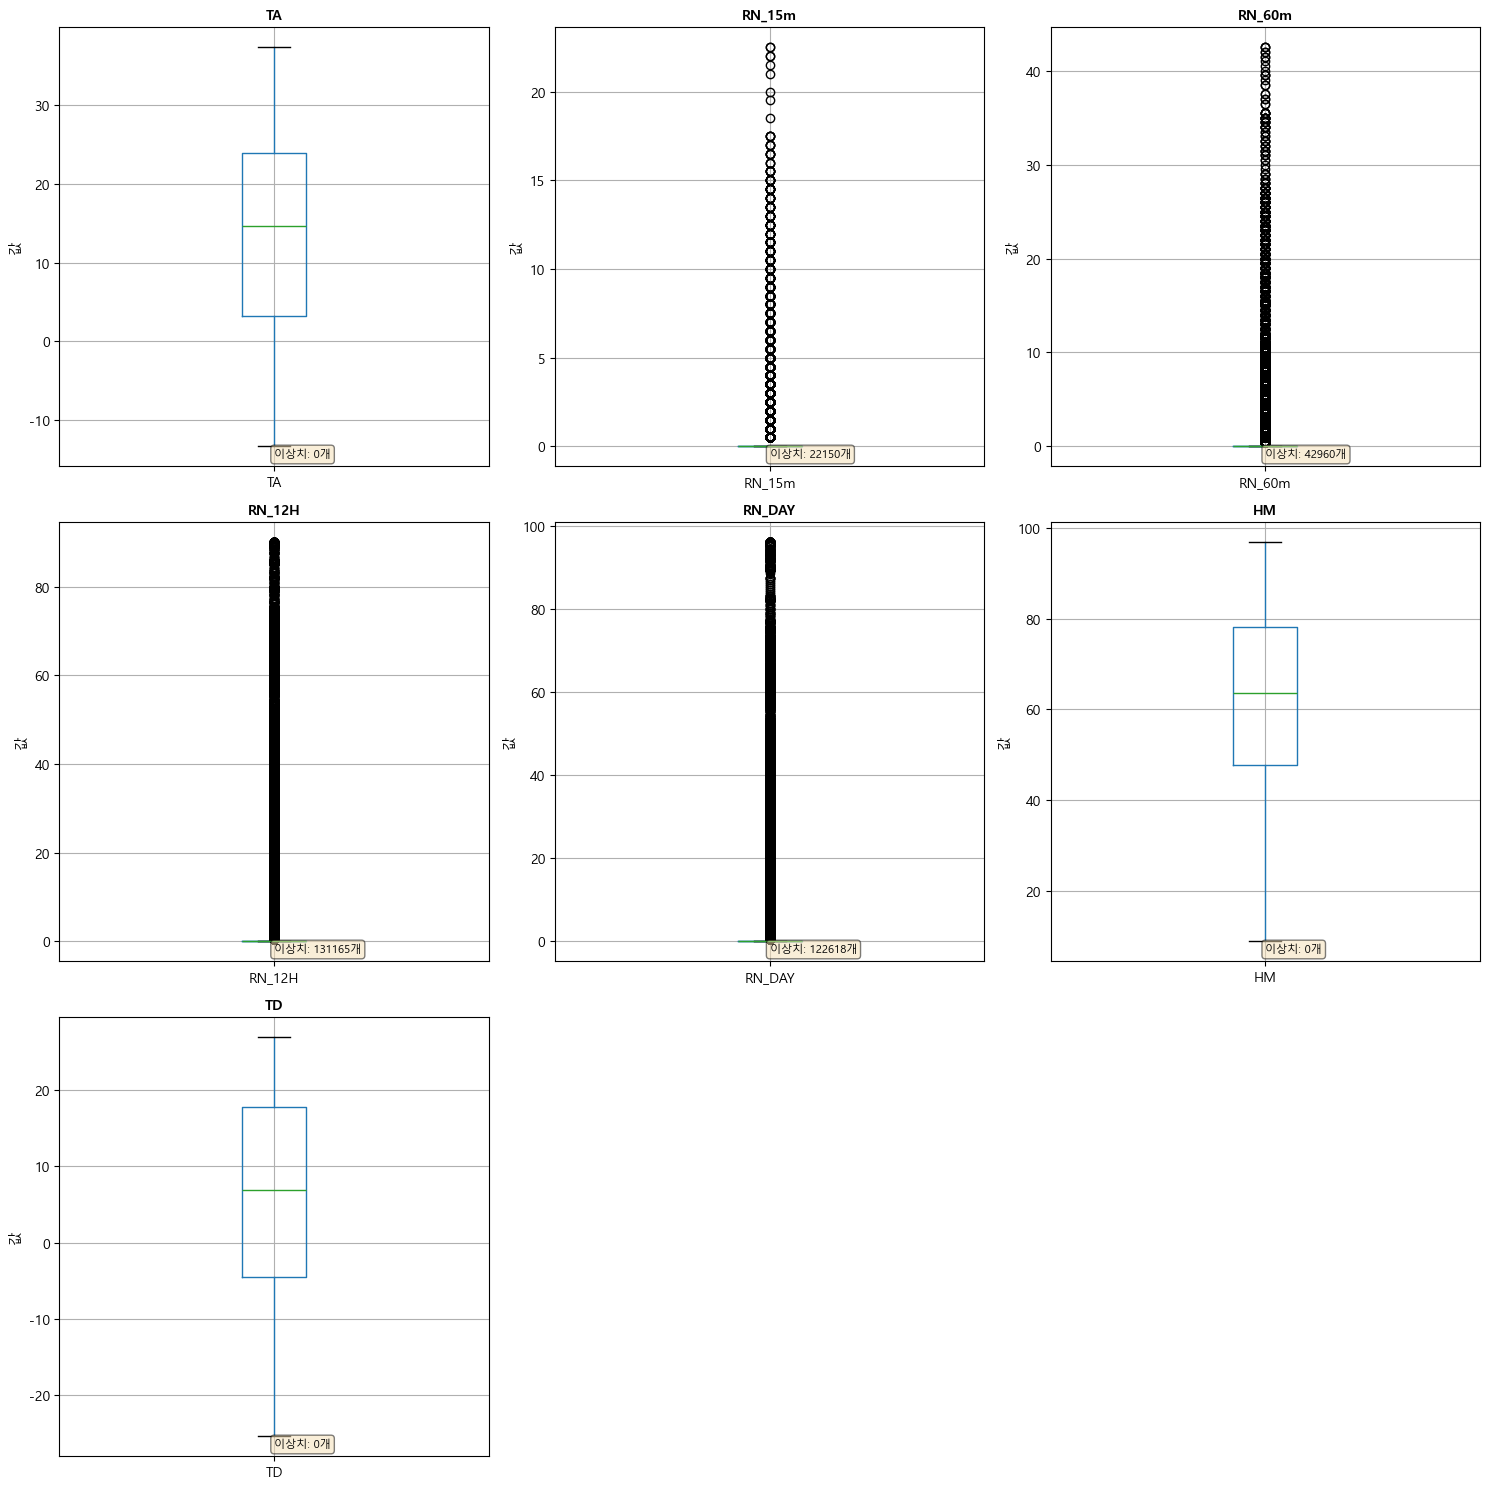


Boxplot 저장 완료: results/boxplot/aws368_boxplot.png

컬럼별 상세 요약

[TA]
  평균: 13.59
  중앙값: 14.70
  표준편차: 11.65
  최소값: -13.40
  최대값: 37.40
  Q1: 3.20, Q3: 23.90, IQR: 20.70
  이상치 개수: 0개 (0.00%)

[RN_15m]
  평균: 0.03
  중앙값: 0.00
  표준편차: 0.34
  최소값: 0.00
  최대값: 22.50
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  이상치 개수: 22150개 (2.83%)

[RN_60m]
  평균: 0.13
  중앙값: 0.00
  표준편차: 1.04
  최소값: 0.00
  최대값: 42.50
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  이상치 개수: 42960개 (5.49%)

[RN_12H]
  평균: 1.62
  중앙값: 0.00
  표준편차: 6.63
  최소값: 0.00
  최대값: 90.00
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  이상치 개수: 131165개 (16.78%)

[RN_DAY]
  평균: 1.75
  중앙값: 0.00
  표준편차: 7.34
  최소값: 0.00
  최대값: 96.00
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  이상치 개수: 122618개 (15.68%)

[HM]
  평균: 62.36
  중앙값: 63.60
  표준편차: 19.49
  최소값: 8.80
  최대값: 96.90
  Q1: 47.80, Q3: 78.30, IQR: 30.50
  이상치 개수: 0개 (0.00%)

[TD]
  평균: 5.87
  중앙값: 6.90
  표준편차: 13.04
  최소값: -25.50
  최대값: 27.00
  Q1: -4.50, Q3: 17.80, IQR: 22.30
  이상치 개수: 0개 (0.00%)


In [78]:
create_boxplot(aws368)


수치형 컬럼 수: 7


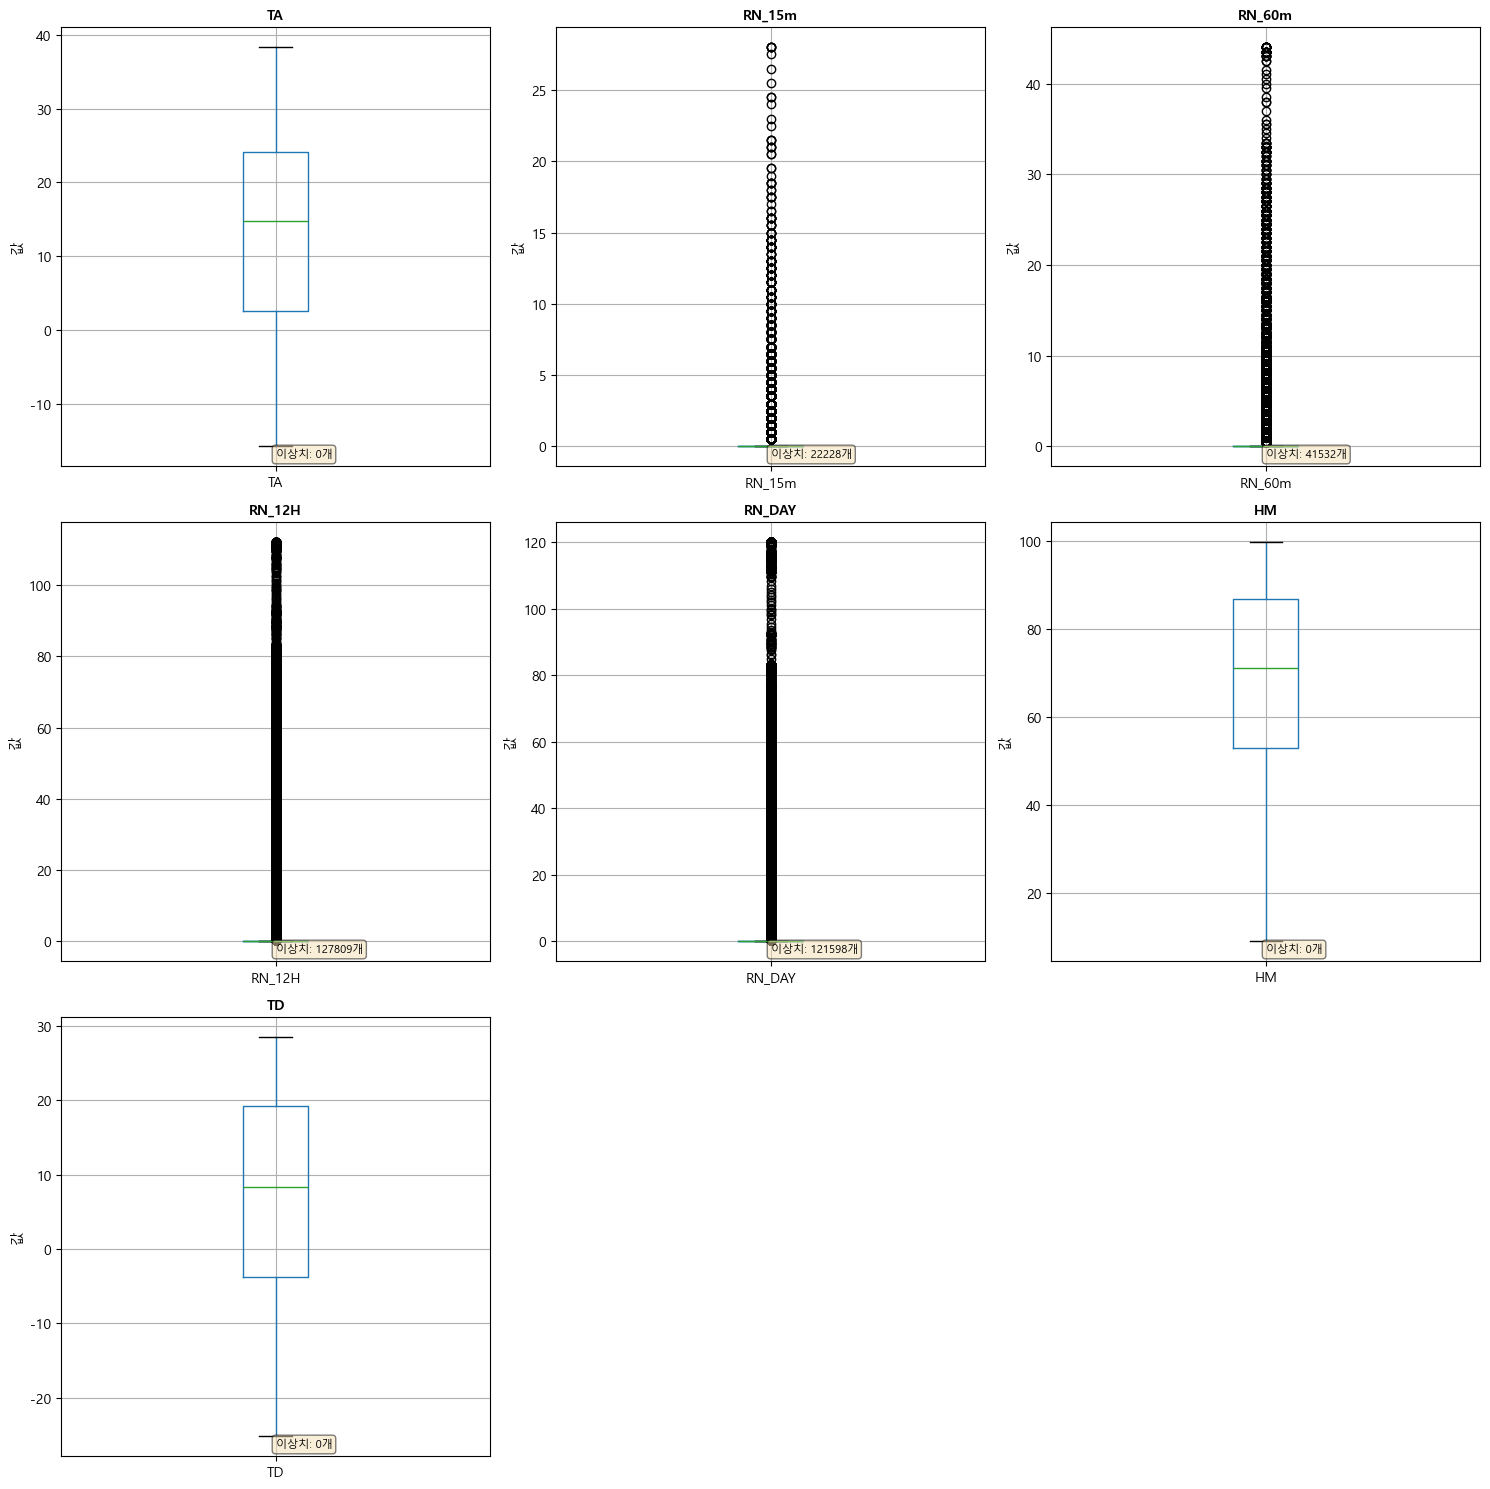


Boxplot 저장 완료: results/boxplot/aws541_boxplot.png

컬럼별 상세 요약

[TA]
  평균: 13.38
  중앙값: 14.70
  표준편차: 12.20
  최소값: -15.80
  최대값: 38.30
  Q1: 2.60, Q3: 24.10, IQR: 21.50
  이상치 개수: 0개 (0.00%)

[RN_15m]
  평균: 0.04
  중앙값: 0.00
  표준편차: 0.36
  최소값: 0.00
  최대값: 28.00
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  이상치 개수: 22228개 (2.68%)

[RN_60m]
  평균: 0.14
  중앙값: 0.00
  표준편차: 1.08
  최소값: 0.00
  최대값: 44.00
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  이상치 개수: 41532개 (5.00%)

[RN_12H]
  평균: 1.70
  중앙값: 0.00
  표준편차: 6.94
  최소값: 0.00
  최대값: 112.00
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  이상치 개수: 127809개 (15.38%)

[RN_DAY]
  평균: 1.74
  중앙값: 0.00
  표준편차: 7.58
  최소값: 0.00
  최대값: 120.00
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  이상치 개수: 121598개 (14.63%)

[HM]
  평균: 68.53
  중앙값: 71.20
  표준편차: 20.68
  최소값: 9.10
  최대값: 99.60
  Q1: 52.90, Q3: 86.80, IQR: 33.90
  이상치 개수: 0개 (0.00%)

[TD]
  평균: 7.02
  중앙값: 8.30
  표준편차: 13.17
  최소값: -25.20
  최대값: 28.50
  Q1: -3.70, Q3: 19.20, IQR: 22.90
  이상치 개수: 0개 (0.00%)


In [79]:
create_boxplot(aws541)


수치형 컬럼 수: 7


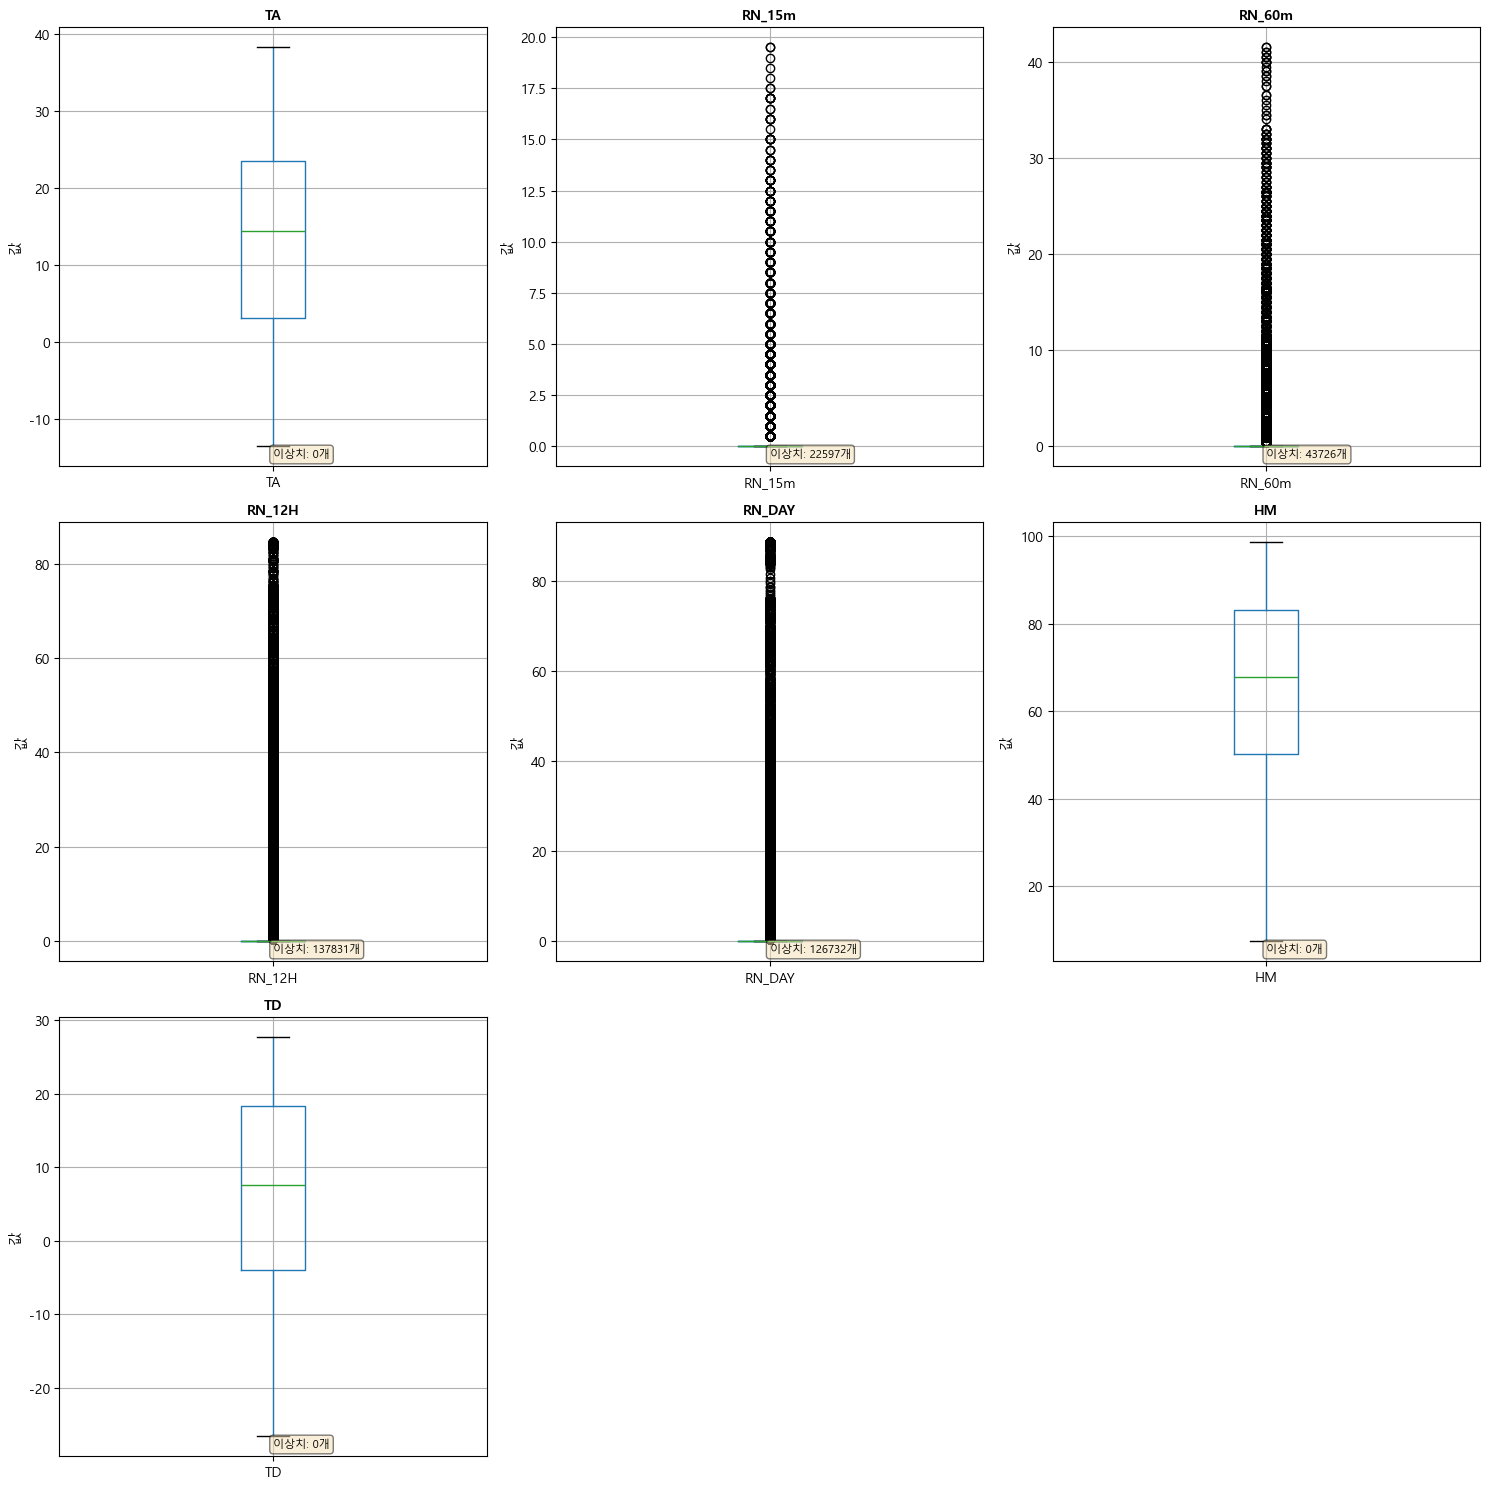


Boxplot 저장 완료: results/boxplot/aws569_boxplot.png

컬럼별 상세 요약

[TA]
  평균: 13.35
  중앙값: 14.40
  표준편차: 11.65
  최소값: -13.50
  최대값: 38.30
  Q1: 3.10, Q3: 23.60, IQR: 20.50
  이상치 개수: 0개 (0.00%)

[RN_15m]
  평균: 0.03
  중앙값: 0.00
  표준편차: 0.33
  최소값: 0.00
  최대값: 19.50
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  이상치 개수: 22597개 (2.89%)

[RN_60m]
  평균: 0.13
  중앙값: 0.00
  표준편차: 1.01
  최소값: 0.00
  최대값: 41.50
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  이상치 개수: 43726개 (5.60%)

[RN_12H]
  평균: 1.58
  중앙값: 0.00
  표준편차: 6.47
  최소값: 0.00
  최대값: 84.50
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  이상치 개수: 137831개 (17.65%)

[RN_DAY]
  평균: 1.71
  중앙값: 0.00
  표준편차: 7.18
  최소값: 0.00
  최대값: 88.50
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  이상치 개수: 126732개 (16.23%)

[HM]
  평균: 65.69
  중앙값: 67.70
  표준편차: 20.53
  최소값: 7.40
  최대값: 98.60
  Q1: 50.20, Q3: 83.20, IQR: 33.00
  이상치 개수: 0개 (0.00%)

[TD]
  평균: 6.37
  중앙값: 7.60
  표준편차: 13.04
  최소값: -26.60
  최대값: 27.70
  Q1: -4.00, Q3: 18.30, IQR: 22.30
  이상치 개수: 0개 (0.00%)


In [80]:
create_boxplot(aws569)

In [81]:
def create_distribution(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    n_cols = len(numeric_cols)
    n_rows = (n_cols + 2) // 3  # 3열로 배치
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
    axes = axes.flatten() if n_cols > 1 else [axes]

    for idx, col in enumerate(numeric_cols):
        ax = axes[idx]
        
        # 결측치 제거
        data = df[col].dropna()
        
        # 히스토그램 + KDE
        sns.histplot(data, kde=True, ax=ax, color='skyblue', stat='density', bins=30)
        
        # 평균선과 중앙값선 추가
        mean_val = data.mean()
        median_val = data.median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'평균: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'중앙값: {median_val:.2f}')
        
        ax.set_title(f'{col}', fontsize=10, fontweight='bold')
        ax.set_xlabel('값')
        ax.set_ylabel('밀도')
        ax.legend(fontsize=8)
        
        # 왜도와 첨도 정보 추가
        skewness = stats.skew(data)
        kurtosis = stats.kurtosis(data)
        ax.text(0.02, 0.98, f'왜도: {skewness:.2f}\n첨도: {kurtosis:.2f}', 
                transform=ax.transAxes, fontsize=8, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # 빈 subplot 제거
    for idx in range(n_cols, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.savefig(f'../../results/distribution/{df.name}_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n" + "=" * 80)
    print(f"Distribution Plot 저장 완료: results/distribution/{df.name}_distribution.png")
    print("=" * 80)

    # 4. 컬럼별 상세 요약 (분포 특성 포함)
    print("\n" + "=" * 80)
    print("컬럼별 분포 특성 요약")
    print("=" * 80)
    for col in numeric_cols:
        data = df[col].dropna()
        
        print(f"\n[{col}]")
        print(f"  평균: {data.mean():.2f}")
        print(f"  중앙값: {data.median():.2f}")
        print(f"  표준편차: {data.std():.2f}")
        print(f"  최소값: {data.min():.2f}")
        print(f"  최대값: {data.max():.2f}")
        print(f"  범위: {data.max() - data.min():.2f}")
        print(f"  왜도(Skewness): {stats.skew(data):.2f} ", end="")
        
        skew_val = stats.skew(data)
        if abs(skew_val) < 0.5:
            print("(대칭적)")
        elif skew_val > 0:
            print("(오른쪽 꼬리가 긴 분포)")
        else:
            print("(왼쪽 꼬리가 긴 분포)")
        
        print(f"  첨도(Kurtosis): {stats.kurtosis(data):.2f} ", end="")
        kurt_val = stats.kurtosis(data)
        if abs(kurt_val) < 0.5:
            print("(정규분포와 유사)")
        elif kurt_val > 0:
            print("(뾰족한 분포)")
        else:
            print("(평평한 분포)")
        
        # 정규성 검정 (Shapiro-Wilk test)
        if len(data) <= 5000:  # 샘플이 너무 크면 검정 생략
            stat, p_value = stats.shapiro(data)
            print(f"  정규성 검정 p-value: {p_value:.4f} ", end="")
            if p_value > 0.05:
                print("(정규분포 가정 가능)")
            else:
                print("(정규분포 아님)")

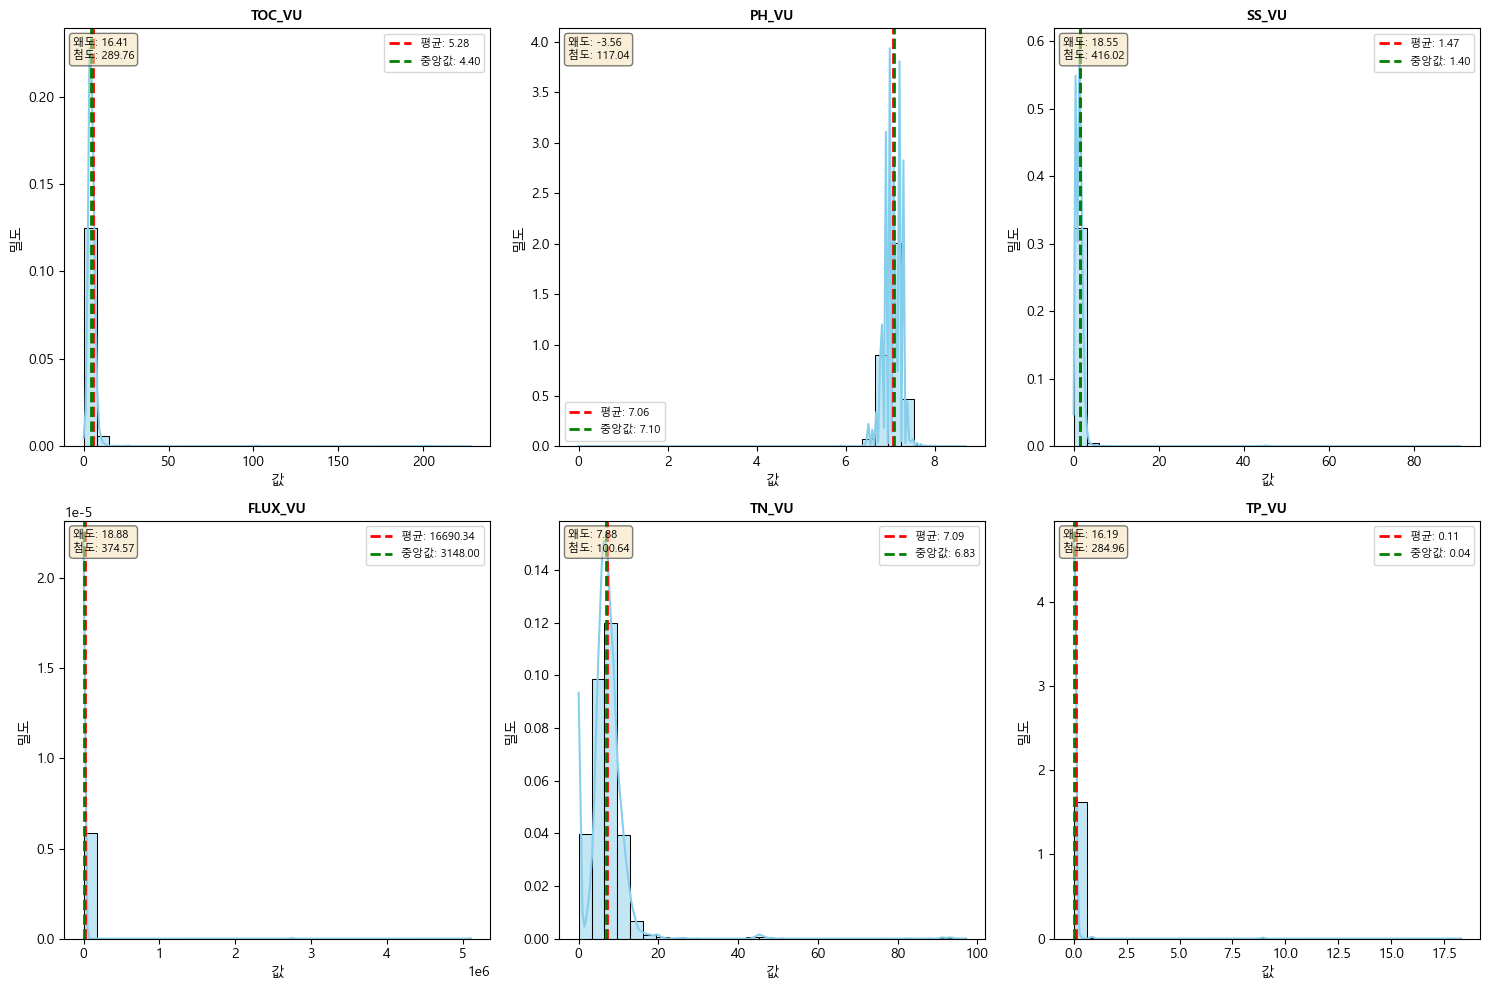


Distribution Plot 저장 완료: results/distribution/tms_distribution.png

컬럼별 분포 특성 요약

[TOC_VU]
  평균: 5.28
  중앙값: 4.40
  표준편차: 10.29
  최소값: 0.00
  최대값: 227.90
  범위: 227.90
  왜도(Skewness): 16.41 (오른쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 289.76 (뾰족한 분포)

[PH_VU]
  평균: 7.06
  중앙값: 7.10
  표준편차: 0.20
  최소값: 0.00
  최대값: 8.70
  범위: 8.70
  왜도(Skewness): -3.56 (왼쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 117.04 (뾰족한 분포)

[SS_VU]
  평균: 1.47
  중앙값: 1.40
  표준편차: 3.04
  최소값: 0.00
  최대값: 91.00
  범위: 91.00
  왜도(Skewness): 18.55 (오른쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 416.02 (뾰족한 분포)

[FLUX_VU]
  평균: 16690.34
  중앙값: 3148.00
  표준편차: 234804.90
  최소값: 0.00
  최대값: 5106780.00
  범위: 5106780.00
  왜도(Skewness): 18.88 (오른쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 374.57 (뾰족한 분포)

[TN_VU]
  평균: 7.09
  중앙값: 6.83
  표준편차: 5.92
  최소값: 0.00
  최대값: 97.10
  범위: 97.10
  왜도(Skewness): 7.88 (오른쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 100.64 (뾰족한 분포)

[TP_VU]
  평균: 0.11
  중앙값: 0.04
  표준편차: 0.90
  최소값: 0.00
  최대값: 18.27
  범위: 18.27
  왜도(Skewness): 16.19 (오른쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 284.

In [82]:
create_distribution(tms)

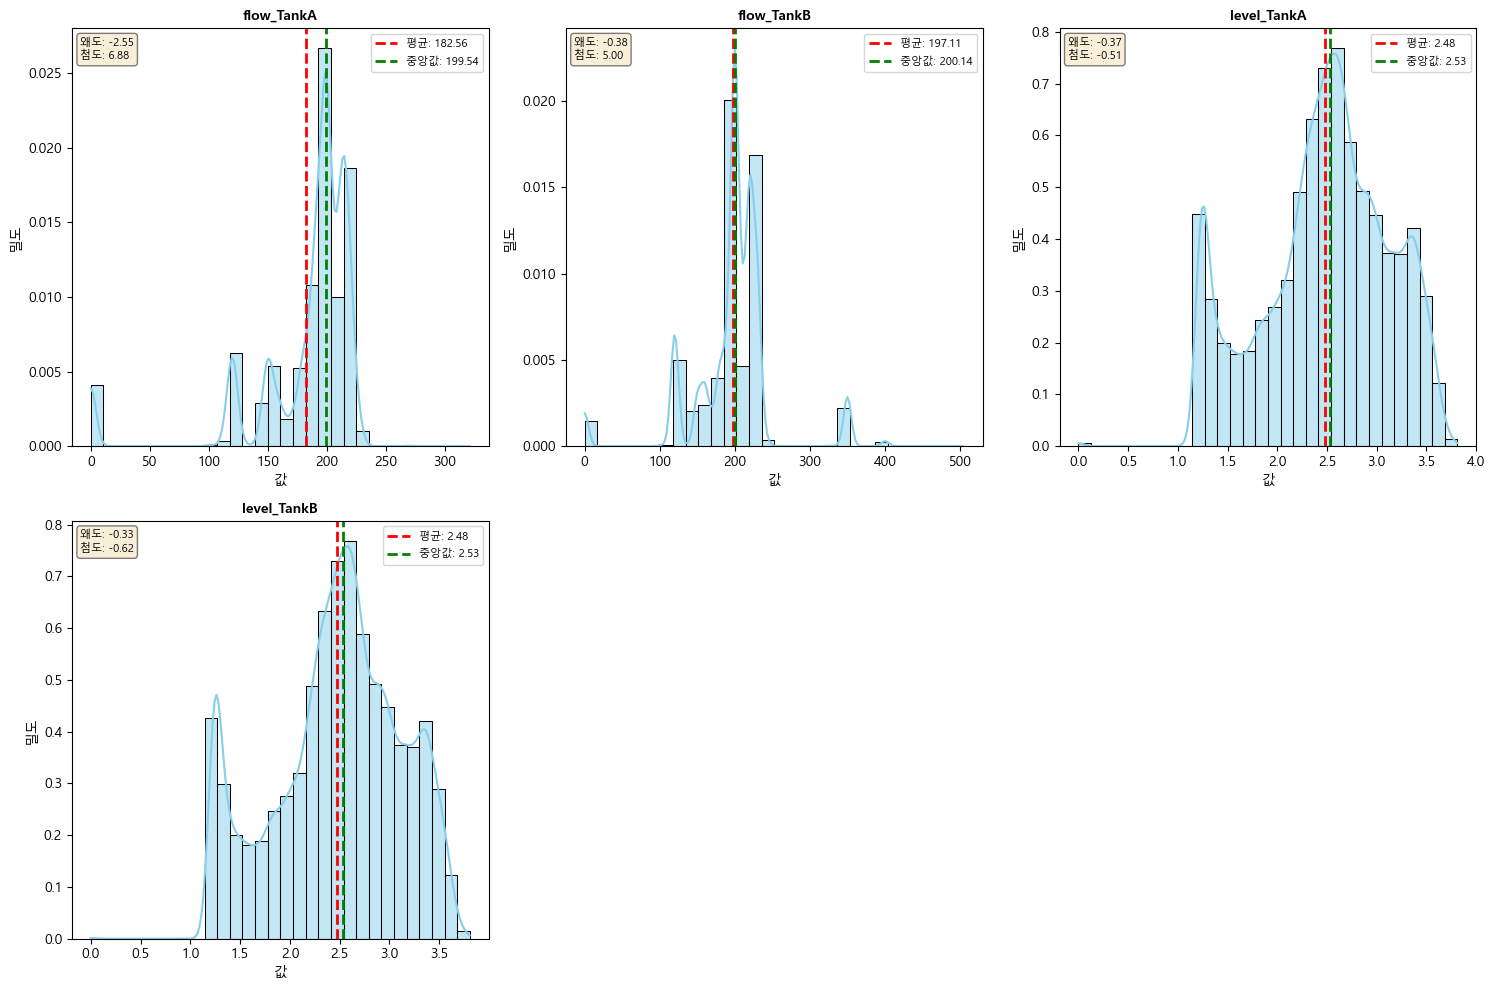


Distribution Plot 저장 완료: results/distribution/flow_distribution.png

컬럼별 분포 특성 요약

[flow_TankA]
  평균: 182.56
  중앙값: 199.54
  표준편차: 47.49
  최소값: 0.00
  최대값: 321.38
  범위: 321.38
  왜도(Skewness): -2.55 (왼쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 6.88 (뾰족한 분포)

[flow_TankB]
  평균: 197.11
  중앙값: 200.14
  표준편차: 53.95
  최소값: 0.00
  최대값: 504.75
  범위: 504.75
  왜도(Skewness): -0.38 (대칭적)
  첨도(Kurtosis): 5.00 (뾰족한 분포)

[level_TankA]
  평균: 2.48
  중앙값: 2.53
  표준편차: 0.64
  최소값: 0.00
  최대값: 3.81
  범위: 3.81
  왜도(Skewness): -0.37 (대칭적)
  첨도(Kurtosis): -0.51 (평평한 분포)

[level_TankB]
  평균: 2.48
  중앙값: 2.53
  표준편차: 0.64
  최소값: 0.00
  최대값: 3.81
  범위: 3.81
  왜도(Skewness): -0.33 (대칭적)
  첨도(Kurtosis): -0.62 (평평한 분포)


In [83]:
create_distribution(flow)

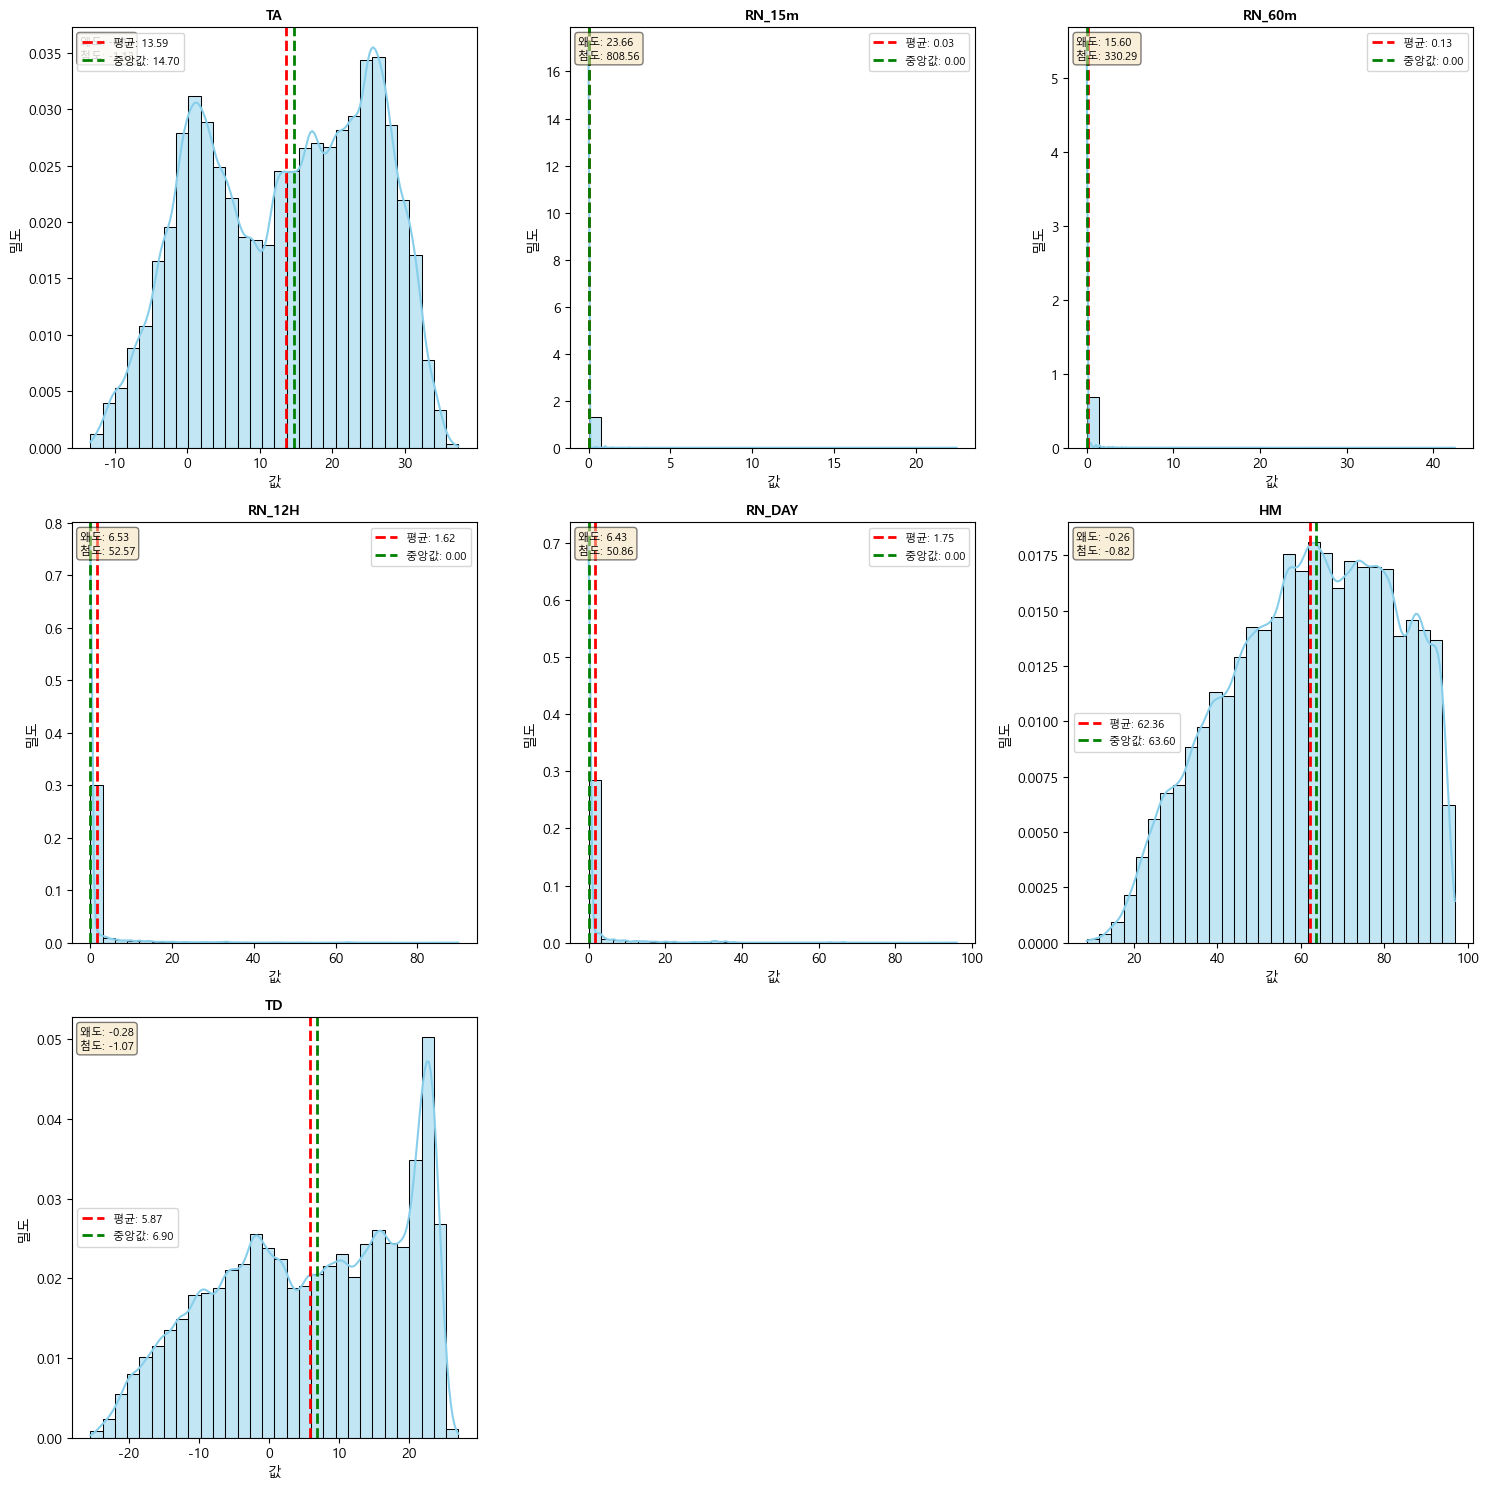


Distribution Plot 저장 완료: results/distribution/aws368_distribution.png

컬럼별 분포 특성 요약

[TA]
  평균: 13.59
  중앙값: 14.70
  표준편차: 11.65
  최소값: -13.40
  최대값: 37.40
  범위: 50.80
  왜도(Skewness): -0.16 (대칭적)
  첨도(Kurtosis): -1.13 (평평한 분포)

[RN_15m]
  평균: 0.03
  중앙값: 0.00
  표준편차: 0.34
  최소값: 0.00
  최대값: 22.50
  범위: 22.50
  왜도(Skewness): 23.66 (오른쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 808.56 (뾰족한 분포)

[RN_60m]
  평균: 0.13
  중앙값: 0.00
  표준편차: 1.04
  최소값: 0.00
  최대값: 42.50
  범위: 42.50
  왜도(Skewness): 15.60 (오른쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 330.29 (뾰족한 분포)

[RN_12H]
  평균: 1.62
  중앙값: 0.00
  표준편차: 6.63
  최소값: 0.00
  최대값: 90.00
  범위: 90.00
  왜도(Skewness): 6.53 (오른쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 52.57 (뾰족한 분포)

[RN_DAY]
  평균: 1.75
  중앙값: 0.00
  표준편차: 7.34
  최소값: 0.00
  최대값: 96.00
  범위: 96.00
  왜도(Skewness): 6.43 (오른쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 50.86 (뾰족한 분포)

[HM]
  평균: 62.36
  중앙값: 63.60
  표준편차: 19.49
  최소값: 8.80
  최대값: 96.90
  범위: 88.10
  왜도(Skewness): -0.26 (대칭적)
  첨도(Kurtosis): -0.82 (평평한 분포)

[TD]
  평균: 5.87
  중앙값: 6.9

In [84]:
create_distribution(aws368)

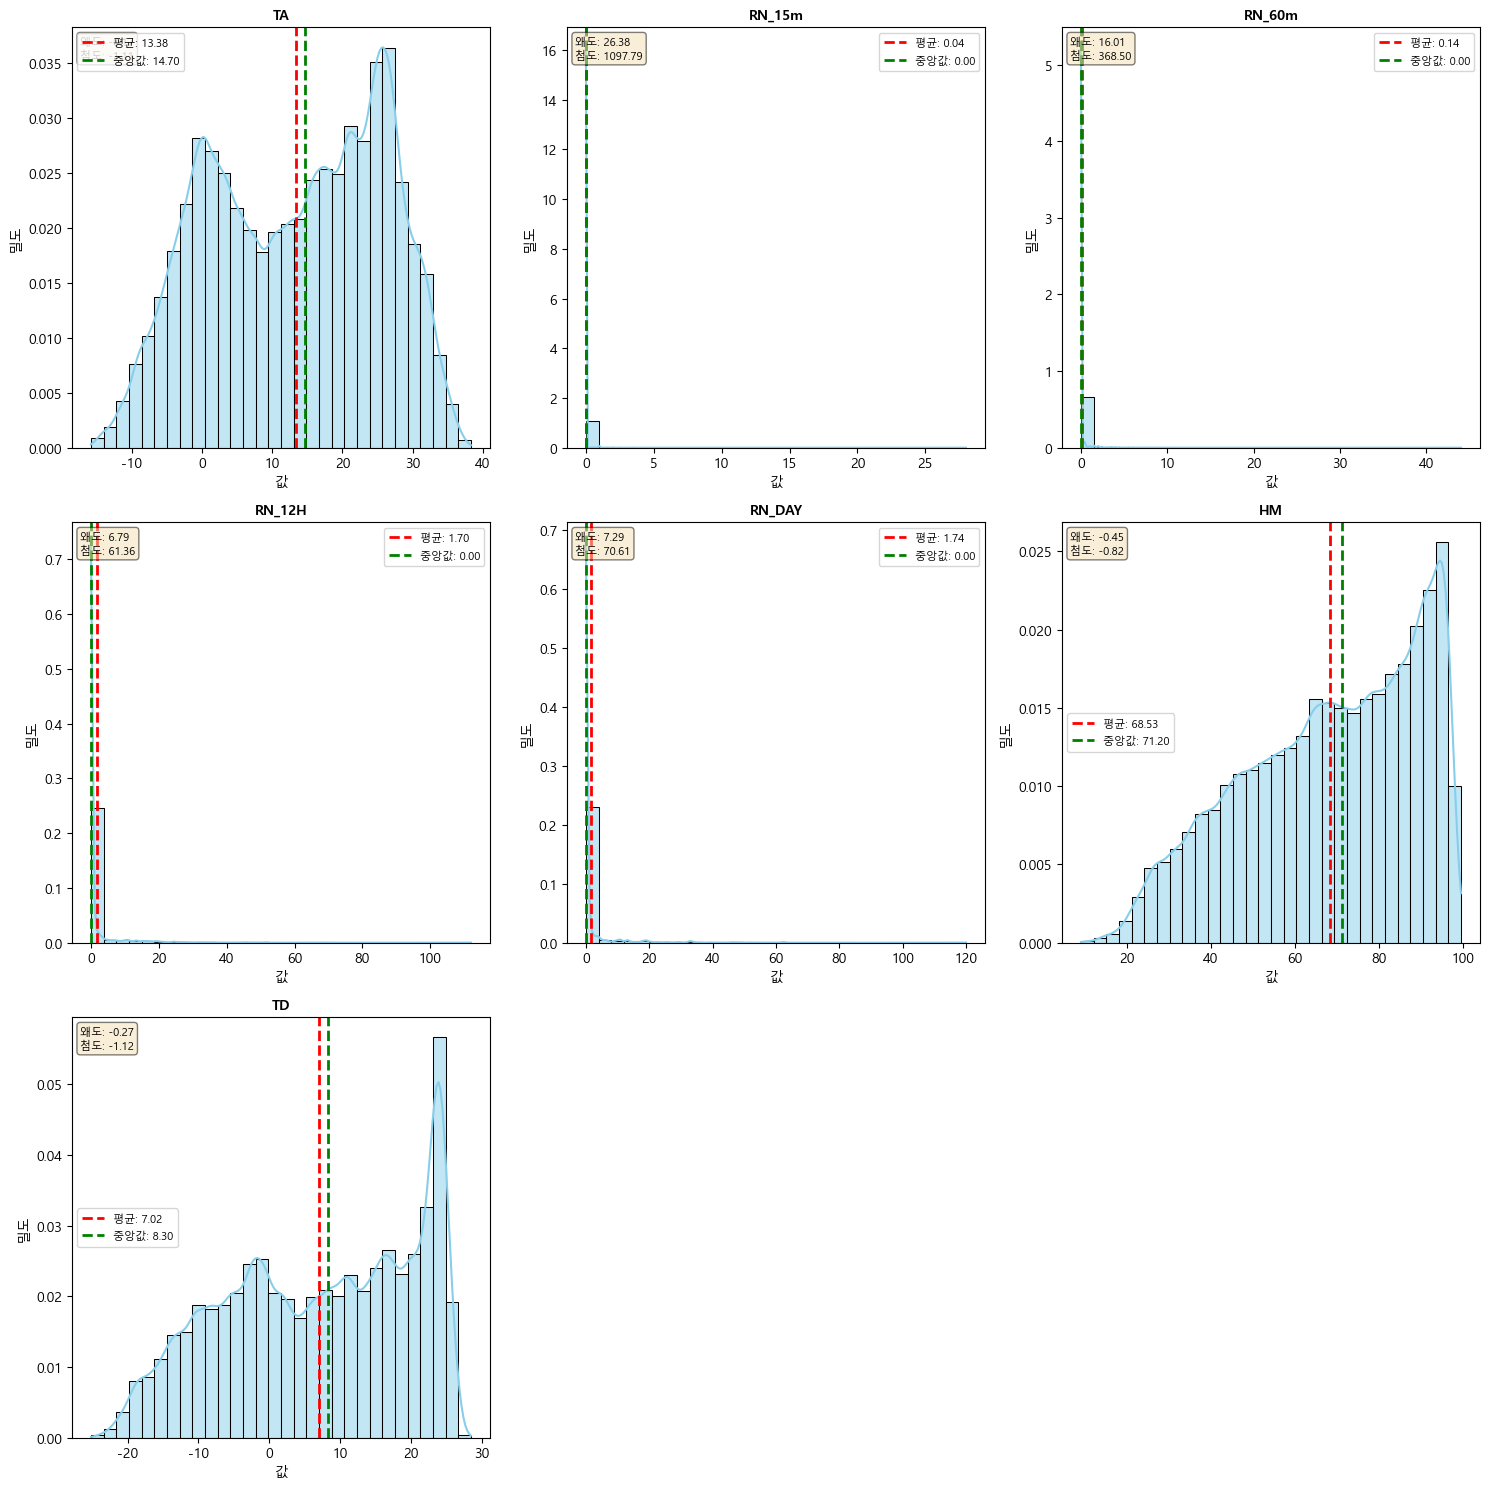


Distribution Plot 저장 완료: results/distribution/aws541_distribution.png

컬럼별 분포 특성 요약

[TA]
  평균: 13.38
  중앙값: 14.70
  표준편차: 12.20
  최소값: -15.80
  최대값: 38.30
  범위: 54.10
  왜도(Skewness): -0.17 (대칭적)
  첨도(Kurtosis): -1.11 (평평한 분포)

[RN_15m]
  평균: 0.04
  중앙값: 0.00
  표준편차: 0.36
  최소값: 0.00
  최대값: 28.00
  범위: 28.00
  왜도(Skewness): 26.38 (오른쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 1097.79 (뾰족한 분포)

[RN_60m]
  평균: 0.14
  중앙값: 0.00
  표준편차: 1.08
  최소값: 0.00
  최대값: 44.00
  범위: 44.00
  왜도(Skewness): 16.01 (오른쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 368.50 (뾰족한 분포)

[RN_12H]
  평균: 1.70
  중앙값: 0.00
  표준편차: 6.94
  최소값: 0.00
  최대값: 112.00
  범위: 112.00
  왜도(Skewness): 6.79 (오른쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 61.36 (뾰족한 분포)

[RN_DAY]
  평균: 1.74
  중앙값: 0.00
  표준편차: 7.58
  최소값: 0.00
  최대값: 120.00
  범위: 120.00
  왜도(Skewness): 7.29 (오른쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 70.61 (뾰족한 분포)

[HM]
  평균: 68.53
  중앙값: 71.20
  표준편차: 20.68
  최소값: 9.10
  최대값: 99.60
  범위: 90.50
  왜도(Skewness): -0.45 (대칭적)
  첨도(Kurtosis): -0.82 (평평한 분포)

[TD]
  평균: 7.02
  중앙값

In [85]:
create_distribution(aws541)

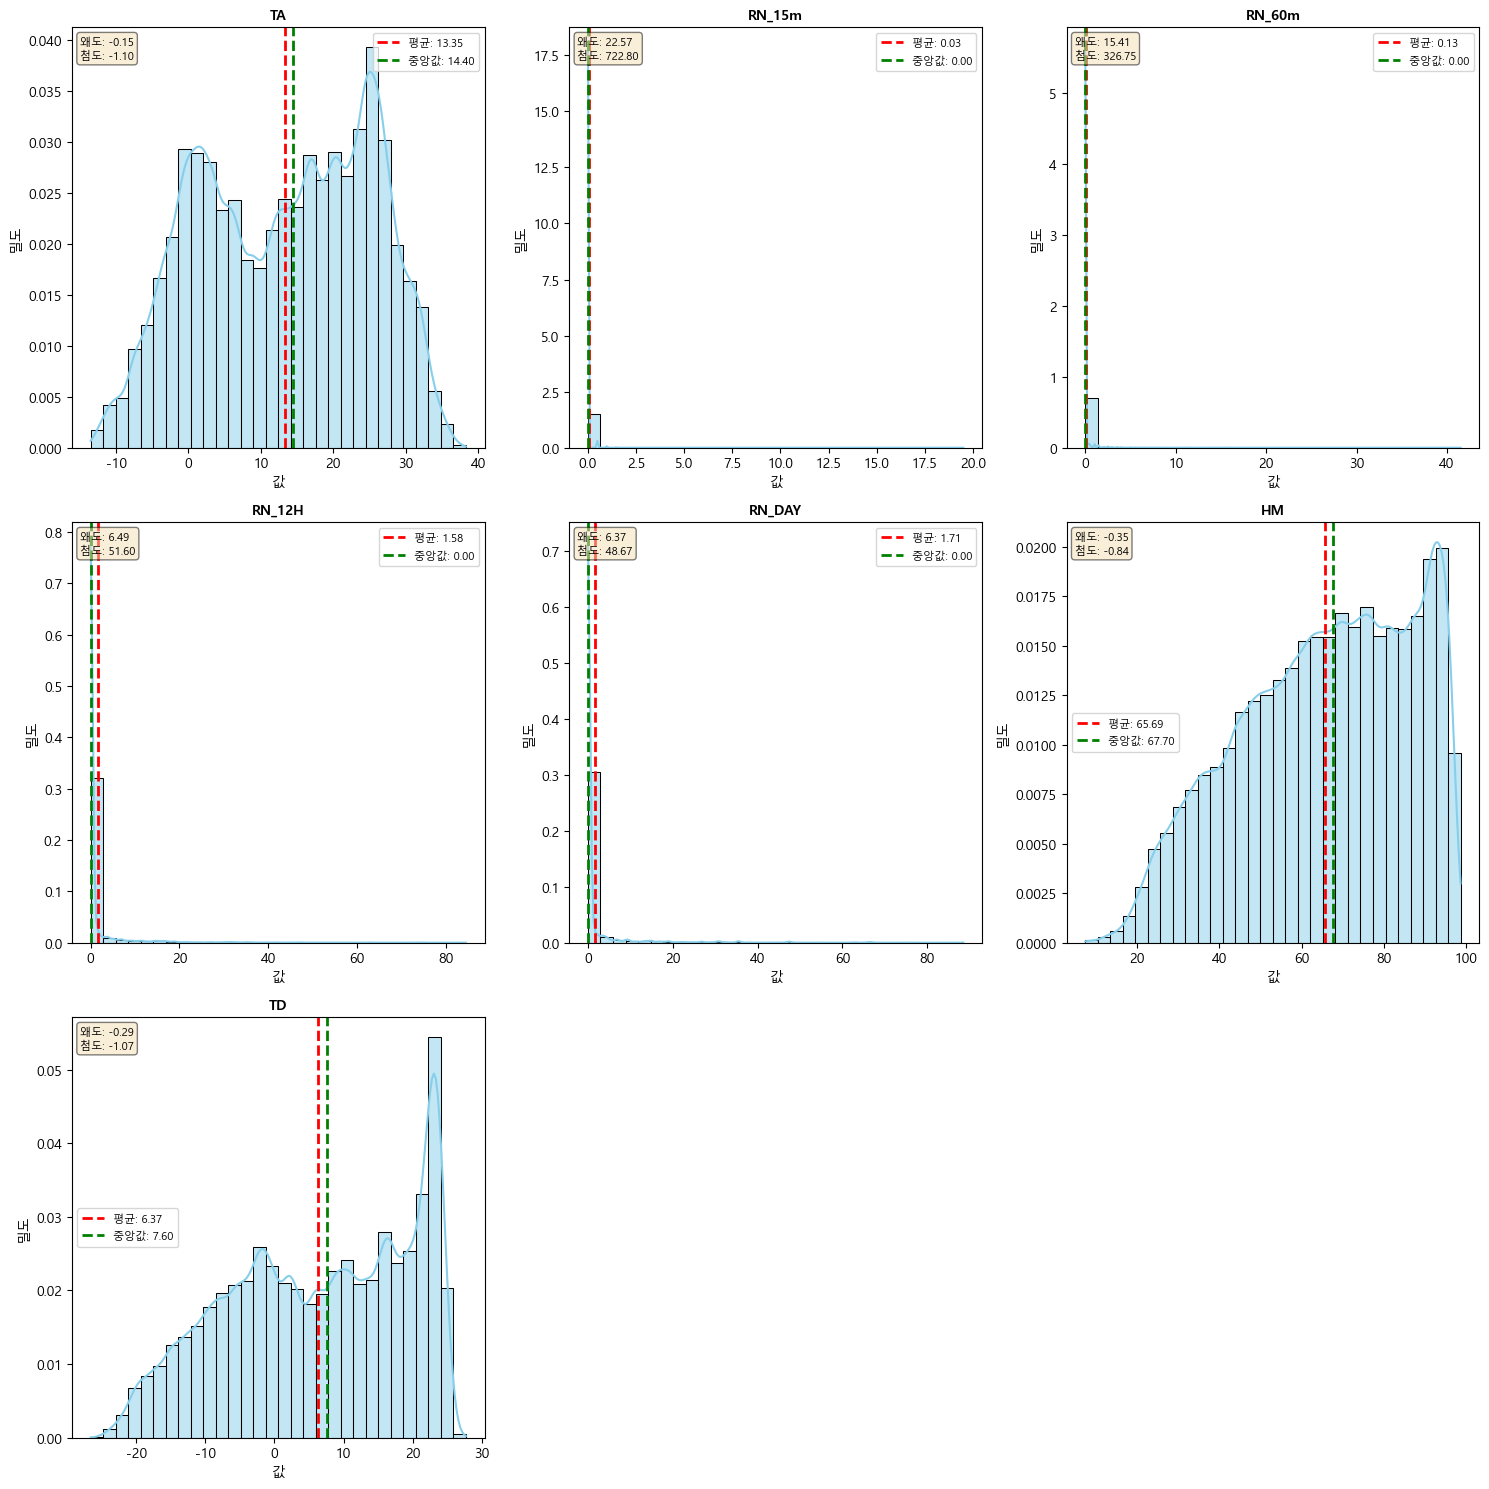


Distribution Plot 저장 완료: results/distribution/aws569_distribution.png

컬럼별 분포 특성 요약

[TA]
  평균: 13.35
  중앙값: 14.40
  표준편차: 11.65
  최소값: -13.50
  최대값: 38.30
  범위: 51.80
  왜도(Skewness): -0.15 (대칭적)
  첨도(Kurtosis): -1.10 (평평한 분포)

[RN_15m]
  평균: 0.03
  중앙값: 0.00
  표준편차: 0.33
  최소값: 0.00
  최대값: 19.50
  범위: 19.50
  왜도(Skewness): 22.57 (오른쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 722.80 (뾰족한 분포)

[RN_60m]
  평균: 0.13
  중앙값: 0.00
  표준편차: 1.01
  최소값: 0.00
  최대값: 41.50
  범위: 41.50
  왜도(Skewness): 15.41 (오른쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 326.75 (뾰족한 분포)

[RN_12H]
  평균: 1.58
  중앙값: 0.00
  표준편차: 6.47
  최소값: 0.00
  최대값: 84.50
  범위: 84.50
  왜도(Skewness): 6.49 (오른쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 51.60 (뾰족한 분포)

[RN_DAY]
  평균: 1.71
  중앙값: 0.00
  표준편차: 7.18
  최소값: 0.00
  최대값: 88.50
  범위: 88.50
  왜도(Skewness): 6.37 (오른쪽 꼬리가 긴 분포)
  첨도(Kurtosis): 48.67 (뾰족한 분포)

[HM]
  평균: 65.69
  중앙값: 67.70
  표준편차: 20.53
  최소값: 7.40
  최대값: 98.60
  범위: 91.20
  왜도(Skewness): -0.35 (대칭적)
  첨도(Kurtosis): -0.84 (평평한 분포)

[TD]
  평균: 6.37
  중앙값: 7.6

In [86]:
create_distribution(aws569)

In [87]:
# 방법 1: 기대하는 전체 범위와 비교
def check_1min_completeness(df):
    # 전체 1분 단위 범위 생성
    full_range = pd.date_range(start=df.index.min(), 
                                end=df.index.max(), 
                                freq='1min')
    
    # 누락된 시간 찾기
    missing = full_range.difference(df.index)
    
    print(f"전체 기간: {df.index.min()} ~ {df.index.max()}")
    print(f"기대 행 수: {len(full_range)}")
    print(f"실제 행 수: {len(df)}")
    print(f"누락 행 수: {len(missing)}")
    
    if len(missing) == 0:
        print("✓ 모든 1분 단위 데이터 존재")
    else:
        print(f"✗ {len(missing)}개 누락")
        print(f"누락된 시간 (처음 10개):\n{missing[:10]}")
    
    return missing


In [88]:
# 사용
flow = pd.read_csv('../../data/actual/FLOW_Actual.csv')
flow['SYS_TIME'] = pd.to_datetime(flow['SYS_TIME'])
flow = flow.set_index('SYS_TIME')
missing_times = check_1min_completeness(flow)

전체 기간: 2025-09-02 23:53:00 ~ 2025-12-03 10:39:00
기대 행 수: 131687
실제 행 수: 130732
누락 행 수: 955
✗ 955개 누락
누락된 시간 (처음 10개):
DatetimeIndex(['2025-09-03 01:20:00', '2025-09-03 01:57:00',
               '2025-09-03 03:13:00', '2025-09-03 17:30:00',
               '2025-09-03 18:21:00', '2025-09-03 22:58:00',
               '2025-09-04 03:13:00', '2025-09-04 06:56:00',
               '2025-09-04 08:11:00', '2025-09-04 09:26:00'],
              dtype='datetime64[us]', freq=None)


In [89]:
# 인덱스 차이 확인
time_diff = flow.index.to_series().diff()
non_1min = time_diff[time_diff != pd.Timedelta('1min')]

if len(non_1min) == 0:
    print("✓ 모든 간격이 1분")
else:
    print(f"✗ 1분이 아닌 간격 {len(non_1min)}개 발견")
    print(non_1min.head())


✗ 1분이 아닌 간격 934개 발견
SYS_TIME
2025-09-02 23:53:00               NaT
2025-09-03 01:21:00   0 days 00:02:00
2025-09-03 01:58:00   0 days 00:02:00
2025-09-03 03:14:00   0 days 00:02:00
2025-09-03 17:31:00   0 days 00:02:00
Name: SYS_TIME, dtype: timedelta64[us]


In [90]:
# 1분 단위로 reindex (누락된 시간은 NaN으로 채움)
full_range = pd.date_range(start=flow.index.min(), 
                            end=flow.index.max(), 
                            freq='1min')
flow_complete = flow.reindex(full_range)

# 누락 확인
print(f"NaN 개수: {flow_complete.isna().sum()}")


NaN 개수: data_save_dt    955
flow_TankA      955
flow_TankB      955
level_TankA     955
level_TankB     955
dtype: int64


In [91]:
# 인덱스 간격 통계
time_diff = flow.index.to_series().diff()
print(time_diff.value_counts())
# 1분이 대부분이면 정상


SYS_TIME
0 days 00:01:00    129798
0 days 00:02:00       927
0 days 00:03:00         2
0 days 00:07:00         2
0 days 00:06:00         1
0 days 00:08:00         1
Name: count, dtype: int64


In [15]:
# 사용
tms = pd.read_csv('../../data/actual/TMS_Actual.csv')
tms['SYS_TIME'] = pd.to_datetime(tms['SYS_TIME'])
tms = tms.set_index('SYS_TIME')
missing_times = check_1min_completeness(tms)

전체 기간: 2024-08-26 15:09:00 ~ 2025-09-29 05:23:00
기대 행 수: 573975
실제 행 수: 514551
누락 행 수: 59424
✗ 59424개 누락
누락된 시간 (처음 10개):
DatetimeIndex(['2024-08-27 10:16:00', '2024-08-29 17:06:00',
               '2024-08-29 17:30:00', '2024-08-29 21:11:00',
               '2024-08-29 21:12:00', '2024-08-29 21:13:00',
               '2024-08-29 21:14:00', '2024-08-29 21:15:00',
               '2024-08-29 21:16:00', '2024-08-29 21:17:00'],
              dtype='datetime64[us]', freq=None)


In [16]:
# 인덱스 차이 확인
time_diff = tms.index.to_series().diff()
non_1min = time_diff[time_diff != pd.Timedelta('1min')]

if len(non_1min) == 0:
    print("✓ 모든 간격이 1분")
else:
    print(f"✗ 1분이 아닌 간격 {len(non_1min)}개 발견")
    print(non_1min.head())


✗ 1분이 아닌 간격 9096개 발견
SYS_TIME
2024-08-26 15:09:00               NaT
2024-08-27 10:17:00   0 days 00:02:00
2024-08-29 17:07:00   0 days 00:02:00
2024-08-29 17:31:00   0 days 00:02:00
2024-08-30 09:15:00   0 days 12:05:00
Name: SYS_TIME, dtype: timedelta64[us]


In [19]:
# 1분 단위로 reindex (누락된 시간은 NaN으로 채움)
full_range = pd.date_range(start=tms.index.min(), 
                            end=tms.index.max(), 
                            freq='1min')
tms_complete = tms.reindex(full_range)

# 누락 확인
print(f"NaN 개수: {tms_complete.isna().sum()}")


NaN 개수: TOC_VU     147455
PH_VU      147455
SS_VU      147455
FLUX_VU    147450
TN_VU      147451
TP_VU      147455
dtype: int64


In [21]:
# 인덱스 간격 통계
time_diff = tms.index.to_series().diff()
print(time_diff.value_counts())
# 1분이 대부분이면 정상


SYS_TIME
0 days 00:01:00     505455
0 days 00:02:00       8854
0 days 00:03:00        152
0 days 00:04:00         23
0 days 00:06:00         10
0 days 00:05:00          8
0 days 00:08:00          5
0 days 00:07:00          5
0 days 00:10:00          4
0 days 00:12:00          3
0 days 00:09:00          3
0 days 00:22:00          2
0 days 00:14:00          2
0 days 00:18:00          2
0 days 12:05:00          1
5 days 00:48:00          1
0 days 00:13:00          1
0 days 00:29:00          1
0 days 11:50:00          1
12 days 19:17:00         1
0 days 00:31:00          1
1 days 22:33:00          1
3 days 01:12:00          1
0 days 00:24:00          1
0 days 03:21:00          1
0 days 15:35:00          1
0 days 16:05:00          1
0 days 23:07:00          1
0 days 16:35:00          1
0 days 01:39:00          1
1 days 20:49:00          1
0 days 00:25:00          1
3 days 20:54:00          1
1 days 17:37:00          1
0 days 01:11:00          1
0 days 00:37:00          1
Name: count, dtype:

In [8]:
def time_series_plot(df, time_col):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    n_cols = len(numeric_cols)
    n_rows = (n_cols + 1) // 2  # 2열로 배치
    fig, axes = plt.subplots(n_rows, 2, figsize=(16, 4 * n_rows))
    axes = axes.flatten() if n_cols > 1 else [axes]

    for idx, col in enumerate(numeric_cols):
        ax = axes[idx]
        
        # 시계열 플롯
        ax.plot(df[time_col], df[col], linewidth=1, alpha=0.7)
        ax.set_title(f'{col} 시계열', fontsize=11, fontweight='bold')
        ax.set_xlabel('시간' if time_col != 'index' else '인덱스')
        ax.set_ylabel(col)
        ax.grid(True, alpha=0.3)
        
        # 평균선 추가
        mean_val = df[col].mean()
        ax.axhline(mean_val, color='red', linestyle='--', linewidth=1.5, 
                alpha=0.7, label=f'평균: {mean_val:.2f}')
        ax.legend(fontsize=8)
        
        # x축 레이블 회전
        if time_col != 'index':
            ax.tick_params(axis='x', rotation=45)

    # 빈 subplot 제거
    for idx in range(n_cols, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.savefig(f'../../results/timeseries/{df.name}_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n" + "=" * 80)
    print(f"시계열 그래프 저장 완료: results/timeseries/{df.name}_plot.png")
    print("=" * 80)

    # 4. 전체 변수를 하나의 그래프에 (정규화)
    fig, ax = plt.subplots(figsize=(16, 6))

    for col in numeric_cols:
        # Min-Max 정규화
        normalized = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
        ax.plot(df[time_col], normalized, label=col, linewidth=1, alpha=0.7)

    ax.set_title('전체 변수 시계열 (정규화)', fontsize=14, fontweight='bold')
    ax.set_xlabel('시간' if time_col != 'index' else '인덱스')
    ax.set_ylabel('정규화된 값 (0-1)')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax.grid(True, alpha=0.3)

    if time_col != 'index':
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig(f'../../results/timeseries/{df.name}_normalized.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"정규화된 시계열 그래프 저장 완료: results/timeseries/{df.name}_normalized.png")

    # 5. 시계열 통계 요약
    print("\n" + "=" * 80)
    print("시계열 통계 요약")
    print("=" * 80)

    for col in numeric_cols:
        print(f"\n[{col}]")
        print(f"  평균: {df[col].mean():.2f}")
        print(f"  표준편차: {df[col].std():.2f}")
        print(f"  최소값: {df[col].min():.2f} (인덱스: {df[col].idxmin()})")
        print(f"  최대값: {df[col].max():.2f} (인덱스: {df[col].idxmax()})")
        print(f"  변동계수(CV): {(df[col].std() / df[col].mean() * 100):.2f}%")
        
        # 추세 확인 (첫 10%와 마지막 10% 비교)
        n = len(df)
        first_10 = df[col].iloc[:n//10].mean()
        last_10 = df[col].iloc[-n//10:].mean()
        change = ((last_10 - first_10) / first_10 * 100) if first_10 != 0 else 0
        print(f"  추세: {change:+.2f}% ", end="")
        if abs(change) < 5:
            print("(안정적)")
        elif change > 0:
            print("(증가 추세)")
        else:
            print("(감소 추세)")

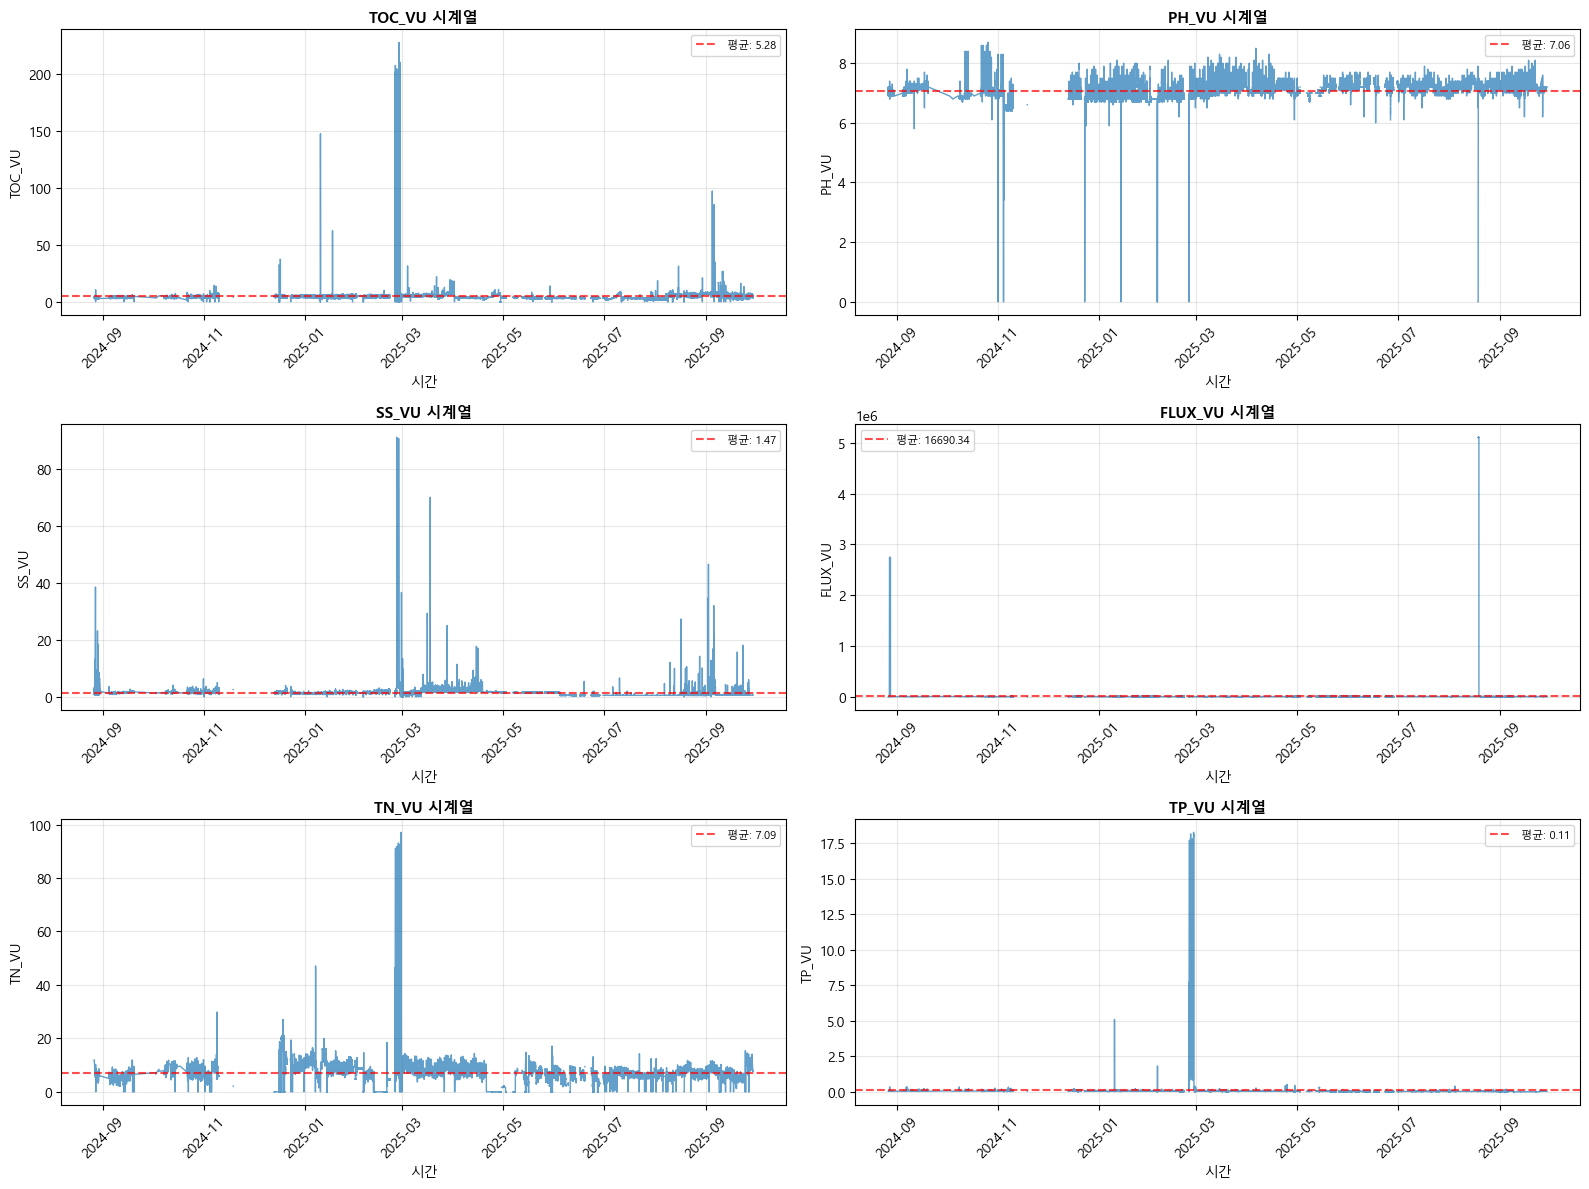


시계열 그래프 저장 완료: results/timeseries/tms_plot.png


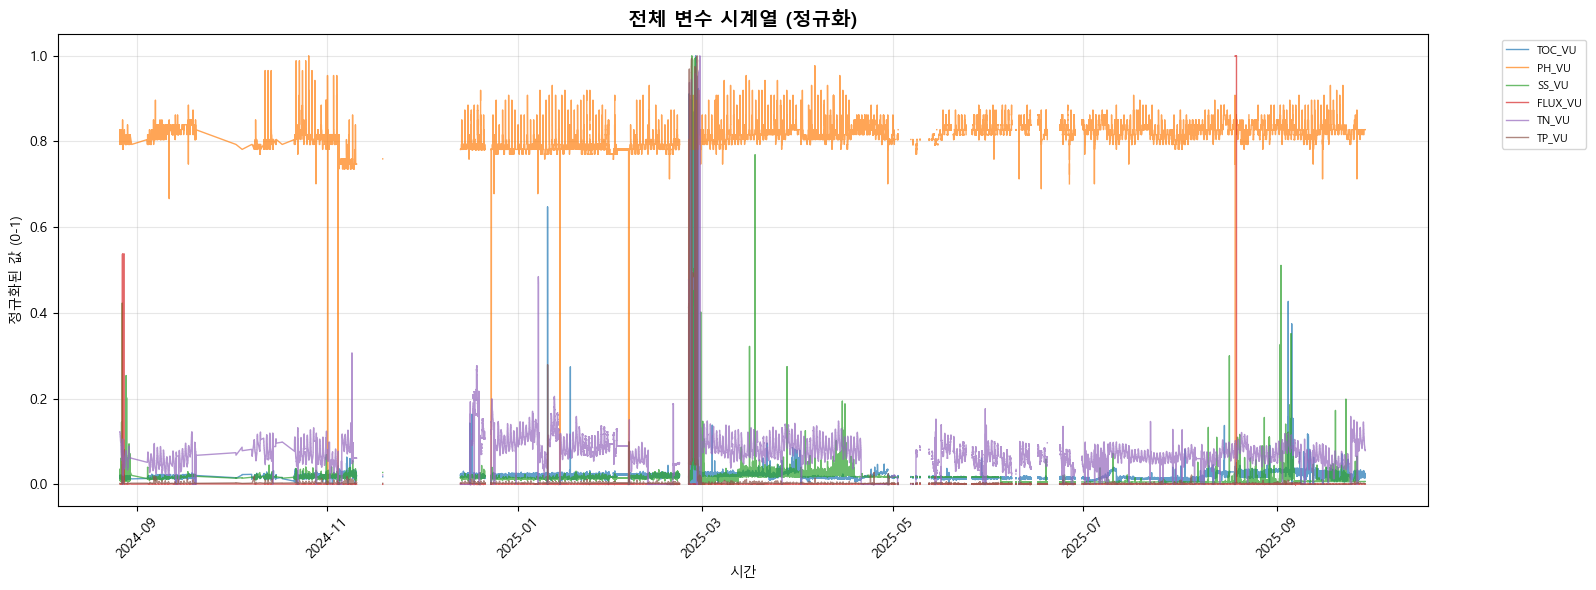

정규화된 시계열 그래프 저장 완료: results/timeseries/tms_normalized.png

시계열 통계 요약

[TOC_VU]
  평균: 5.28
  표준편차: 10.29
  최소값: 0.00 (인덱스: 1190)
  최대값: 227.90 (인덱스: 206304)
  변동계수(CV): 194.65%
  추세: +60.24% (증가 추세)

[PH_VU]
  평균: 7.06
  표준편차: 0.20
  최소값: 0.00 (인덱스: 47887)
  최대값: 8.70 (인덱스: 39173)
  변동계수(CV): 2.81%
  추세: +1.46% (안정적)

[SS_VU]
  평균: 1.47
  표준편차: 3.04
  최소값: 0.00 (인덱스: 47887)
  최대값: 91.00 (인덱스: 204487)
  변동계수(CV): 207.07%
  추세: -40.15% (감소 추세)

[FLUX_VU]
  평균: 16690.34
  표준편차: 234804.90
  최소값: 0.00 (인덱스: 1217)
  최대값: 5106780.00 (인덱스: 455185)
  변동계수(CV): 1406.83%
  추세: -91.94% (감소 추세)

[TN_VU]
  평균: 7.09
  표준편차: 5.92
  최소값: 0.00 (인덱스: 1303)
  최대값: 97.10 (인덱스: 208125)
  변동계수(CV): 83.51%
  추세: +3.29% (안정적)

[TP_VU]
  평균: 0.11
  표준편차: 0.90
  최소값: 0.00 (인덱스: 34217)
  최대값: 18.27 (인덱스: 206862)
  변동계수(CV): 833.88%
  추세: -66.74% (감소 추세)


In [97]:
time_series_plot(tms, "SYS_TIME")

In [ ]:
time_series_plot(flow, "SYS_TIME")

In [ ]:
time_series_plot(aws368, "datetime")

In [ ]:
time_series_plot(aws541, "datetime")

In [ ]:
time_series_plot(aws569, "datetime")